# Homework 5: Exploratory Data Analysis (EDA)
In this assignment, you are going to perform exploratory data analysis (EDA) on a small dataset of your choice. You can choose any dataset you like, but you are encouraged to pick a dataset that you are interested in. You can use the datasets you have used in the previous assignments or you can choose a new dataset. If you don't have a dataset in mind, you can choose one from the datasets in the `Datasets` folder of the course repository.

### Instructions

1. Follow the instructions on how to setup your Python and Jupyter (or VSCode) environment and cloning or downloading our repository. Instructions can be found in the class notes:
   https://filipinascimento.github.io/usable_ai/m00-setup/class
2. Ensure that you have Python and Jupyter Notebook working. (You can also try using Google Colab. This is not the preferred method for this homework, but it is an option)
3. Load the dataset of your choice into a Pandas dataframe
4. Perform exploratory data analysis (EDA) on the dataset. Your analysis should include the following:
    - Summary statistics of the dataset
    - Data cleaning and preprocessing
    - Data visualization (e.g., histograms, scatterplots, etc.)
    - You should write a brief summary of the insights and conclusions you have drawn from your analysis.
    You can use the [exploratory_data_analysis.ipynb](notebook) as a reference.
5. **Important**: Create both code and markdown cells in your notebook to document your analysis.
6. Submit your completed notebook as a HTML export, or a PDF file.

### Submission Guidelines

- Submit your completed notebook as a HTML export, or a PDF file.

To export to HTML, if you are on Jupyter, select `File` > `Export Notebook As` > `HTML`.

If you are on VSCode, you can use the `Jupyter: Export to HTML` command.
 - Open the command palette (Ctrl+Shift+P or Cmd+Shift+P on Mac).
    - Search for `Jupyter: Export to HTML`.
    - Save the HTML file to your computer and submit it via Canvas.

---

> 
> **Using Generative AI Responsibly**
>
> You're welcome to use Generative AI to assist your learning, but focus on understanding the concepts rather than just solving the assignment. For example, instead of copying and pasting the question into the model, ask it to explain the concept in the question. Try asking: `How can I open a file in Python? Can you give me examples?` or `What functions and methods can I use to extract the words of a text file? Can you explain how they work with some examples?`
>
> This way, you will learn how the solution works while building your skills. Remember to give context to the generative AI, so it can better assist you. Talk to the instructor and AIs if you have any questions or need insights.

Create your cells below this one. Hint: start by imporint the necessary libraries and loading your dataset.

___
## SOURCE DATASET ##

Took data from **FormulaAI Hackathon 2022** for the first theme about creating an accurate weather prediction model for the F1 2021 video game.
The data is given in two formats CSV and JSON. I took the CSV as it is faster to process in my PC (size 716 MB).

``[1]`` https://www.kaggle.com/datasets/oracledevrel/formulaaihackathon2022

``[2]`` https://github.com/oracle-devrel/formula-ai-2022-hackathon

``[3]`` https://github.com/oracle-devrel/formula-ai-2022-hackathon/blob/main/challenges/challenge1.md

---

### Load the dataset of your choice into a Pandas dataframe

In [1]:
# Load modules needed - following "Module 05 - Exploratory Data Analysis"
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os

# Local directory
print(os.getcwd())

c:\Users\ricardo\Documents\GitHub\usable_ai\Homework


### Explanation about selection of the input file format ###

Initially, I selected the .csv but it flatten the data that was included as objects under columns "
It means that by using .csv, I ended skyrocketing the number of entries (or rows).

The JSON took more time to load but I do not end up with the problem of artifitialy create duplicates.
So I decided to select the JSON file.

```log .CSV file
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns)
```

```log .JSON file
RangeIndex: 339692 entries, 0 to 339691
Data columns (total 41 columns)
```
**What is happening between .CSV vs. .JSON**

Im this case, it is not a problem as it is only one instance for the different components of the object, so it is translated as additional columns.

|JSON | CSV (multiple columns) |
|---|---|
|m_header (object)<br/>{'m_packet_format': 2021, <br/>'m_game_major_version': 1, <br/>'m_game_minor_version': 14, <br/>'m_packet_version': 1, <br/>'m_packet_id': 1, <br/>'m_session_uid': 13002103581294142936, <br/>'m_session_time': 2803.836, <br/>'m_frame_identifier': 82458, <br/>'m_player_car_index': 0, <br/>'m_secondary_player_car_index': 255}|M_PACKET_FORMAT<br/>M_GAME_MAJOR_VERSION<br/>M_GAME_MINOR_VERSION<br/>M_PACKET_VERSION<br/>M_PACKET_ID<br/>...<br/>M_SECONDARY_PLAYER_CAR_INDEX|

But in this case then the duplication start to appeared so it is possible get rid of the object and end up with additional columns:

|JSON |
|---|
m_marshal_zones (object)<br/>[{'m_zone_start': 0.088, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.167, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.23800000000000002, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.298, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.353, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.41200000000000003, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.45, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.495, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.54, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.62, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.6900000000000001, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.726, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.789, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.8310000000000001, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.925, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0.997, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, <br/>{'m_zone_start': 0, 'm_zone_flag': 0}]|

The above applies to the other 3 objects: ```m_marshal_zones```, ```gamehost```, ```m_weather_forecast_samples```.

In [2]:
# Getting info about objects in JSON

pd.set_option('max_colwidth', 50) # Set the maximum width of column to display all content so it is easy to observe the objects
# print(df_weather['m_weather_forecast_samples'].head(1))

# {'m_packet_format': 2021, 'm_game_major_version': 1, 'm_game_minor_version': 14, 'm_packet_version': 1, 'm_packet_id': 1, 'm_session_uid': 13002103581294142936, 'm_session_time': 2803.836, 'm_frame_identifier': 82458, 'm_player_car_index': 0, 'm_secondary_player_car_index': 255}
# Name: m_header, dtype: object

# [{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'m_zone_start': 0.167, 'm_zone_flag': 0}, {'m_zone_start': 0.23800000000000002, 'm_zone_flag': 0}, {'m_zone_start': 0.298, 'm_zone_flag': 0}, {'m_zone_start': 0.353, 'm_zone_flag': 0}, {'m_zone_start': 0.41200000000000003, 'm_zone_flag': 0}, {'m_zone_start': 0.45, 'm_zone_flag': 0}, {'m_zone_start': 0.495, 'm_zone_flag': 0}, {'m_zone_start': 0.54, 'm_zone_flag': 0}, {'m_zone_start': 0.62, 'm_zone_flag': 0}, {'m_zone_start': 0.6900000000000001, 'm_zone_flag': 0}, {'m_zone_start': 0.726, 'm_zone_flag': 0}, {'m_zone_start': 0.789, 'm_zone_flag': 0}, {'m_zone_start': 0.8310000000000001, 'm_zone_flag': 0}, {'m_zone_start': 0.925, 'm_zone_flag': 0}, {'m_zone_start': 0.997, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}]
# Name: m_marshal_zones, dtype: object

# f1digest
# Name: gamehost, dtype: object

# [{'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_sessio...
# Name: m_weather_forecast_samples, dtype: object

### Perform exploratory data analysis (EDA) on the dataset.

In [3]:
# df_weather = pd.read_csv("../Datasets/weather.csv")
df_weather = pd.read_json("../Datasets/weather.json")
df_weather.head()

,m_header,m_braking_assist,m_session_link_identifier,m_pit_release_assist,timestamp,m_marshal_zones,m_pit_stop_window_ideal_lap,m_track_temperature,m_track_length,m_game_paused,...,m_weather,m_ai_difficulty,m_pit_speed_limit,m_network_game,m_total_laps,m_steering_assist,m_is_spectating,m_dynamic_racing_line,m_drsassist,m_num_marshal_zones
0,"{'m_packet_format': 2021, 'm_game_major_versio...",0,0,0,2022-01-16 19:32:00,"[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...",0,33,4650,0,...,0,0,80,0,200,0,0,0,0,16
1,"{'m_packet_format': 2021, 'm_game_major_versio...",0,0,0,2022-01-16 19:35:18,"[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...",0,33,4650,0,...,0,0,80,0,200,0,0,0,0,16
2,"{'m_packet_format': 2021, 'm_game_major_versio...",0,0,0,2022-01-16 19:32:02,"[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...",0,33,4650,0,...,0,0,80,0,200,0,0,0,0,16
3,"{'m_packet_format': 2021, 'm_game_major_versio...",0,0,0,2022-01-16 19:32:18,"[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...",0,33,4650,0,...,0,0,80,0,200,0,0,0,0,16
4,"{'m_packet_format': 2021, 'm_game_major_versio...",0,0,0,2022-01-16 19:32:34,"[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...",0,33,4650,0,...,0,0,80,0,200,0,0,0,0,16


In [4]:
# Data types
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339692 entries, 0 to 339691
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   m_header                        339692 non-null  object        
 1   m_braking_assist                339692 non-null  int64         
 2   m_session_link_identifier       339692 non-null  int64         
 3   m_pit_release_assist            339692 non-null  int64         
 4   timestamp                       339692 non-null  datetime64[ns]
 5   m_marshal_zones                 339692 non-null  object        
 6   m_pit_stop_window_ideal_lap     339692 non-null  int64         
 7   m_track_temperature             339692 non-null  int64         
 8   m_track_length                  339692 non-null  int64         
 9   m_game_paused                   339692 non-null  int64         
 10  m_forecast_accuracy             339692 non-null  int64  

### Reference of columns data types and adding definition per ```[2]```

| Column | Non-Null Count | Type | Definition [2] |
|---|---|---|---|
|m_header                        |339692 non-null  |object        |Object: Header
|m_braking_assist                |339692 non-null  |int64         |0 = off, 1 = low, 2 = medium, 3 = high
|m_session_link_identifier       |339692 non-null  |int64         |Identifier for session - persists across save
|m_pit_release_assist            |339692 non-null  |int64         |0 = off, 1 = on
|timestamp                       |339692 non-null  |datetime64[ns]|timestamp for when the packet was received
|m_marshal_zones                 |339692 non-null  |object        |Object: zone_start::Fraction (0..1) of way through the lap the marshal zone starts;<br/> zone_flag::-1 = invalid/unknown, 0 = none, 1 = green, 2 = blue, 3 = yellow, 4 = red
|m_pit_stop_window_ideal_lap     |339692 non-null  |int64         |Ideal lap to pit on for current strategy (player)
|m_track_temperature             |339692 non-null  |int64         |Track temp. in degrees celsius
|m_track_length                  |339692 non-null  |int64         |Track length in metres
|m_game_paused                   |339692 non-null  |int64         |Whether the game is paused
|m_forecast_accuracy             |339692 non-null  |int64         |0 = Perfect, 1 = Approximate.
|gamehost                        |316403 non-null  |object        |Unique identifier for the host that captured the data (not relevant) 
|m_air_temperature               |339692 non-null  |int64         |Air temp. in degrees celsius
|m_num_weather_forecast_samples  |339692 non-null  |int64         |Object of weather forecast samples
|m_sli_pro_native_support        |339692 non-null  |int64         |SLI Pro support, 0 = inactive, 1 = active
|m_safety_car_status             |339692 non-null  |int64         |0 = no safety car, 1 = full, 2 = virtual, 3 = formation lap
|m_track_id                      |339692 non-null  |int64         |-1 for unknown, 0-21 for tracks
|m_ersassist                     |339692 non-null  |int64         |0 = off, 1 = on
|m_formula                       |339692 non-null  |int64         |Formula, 0 = F1 Modern, 1 = F1 Classic, 2 = F2, 3 = F1 Generic
|m_season_link_identifier        |339692 non-null  |int64         |Identifier for season - persists across saves
|m_pit_assist                    |339692 non-null  |int64         |0 = off, 1 = on
|m_gearbox_assist                |339692 non-null  |int64         |1 = manual, 2 = manual & suggested gear, 3 = auto
|m_session_type                  |339692 non-null  |int64         |0 = unknown, 1 = P1, 2 = P2, 3 = P3, 4 = Short P, 5 = Q1, 6 = Q2, 7 = Q3, 8 = Short Q, <br/>9 = OSQ, 10 = R, 11 = R2, 12 = R3, 13 = Time Trial
|m_spectator_car_index           |339692 non-null  |int64         |Index of the car being spectated
|m_pit_stop_window_latest_lap    |339692 non-null  |int64         |Latest lap to pit on for current strategy (player)
|m_weekend_link_identifier       |339692 non-null  |int64         |Identifier for weekend - persists across saves
|m_dynamic_racing_line_type      |339692 non-null  |int64         |0 = 2D, 1 = 3D
|m_session_time_left             |339692 non-null  |int64         |Time left in session in seconds
|m_session_duration              |339692 non-null  |int64         |Session duration in seconds
|m_pit_stop_rejoin_position      |339692 non-null  |int64         |Predicted position to rejoin at (player)
|m_weather_forecast_samples      |339692 non-null  |object        |Object: weather forecast
|m_weather                       |339692 non-null  |int64         |Weather - 0 = clear, 1 = light cloud, 2 = overcast, 3 = light rain, 4 = heavy rain, 5 = storm
|m_ai_difficulty                 |339692 non-null  |int64         |AI Difficulty rating – 0-110
|m_pit_speed_limit               |339692 non-null  |int64         |Pit speed limit in kilometres per hour
|m_network_game                  |339692 non-null  |int64         |0 = offline, 1 = online
|m_total_laps                    |339692 non-null  |int64         |Total number of laps in this race
|m_steering_assist               |339692 non-null  |int64         |0 = off, 1 = on
|m_is_spectating                 |339692 non-null  |int64         |Whether the player is spectating
|m_dynamic_racing_line           |339692 non-null  |int64         |0 = off, 1 = corners only, 2 = full
|m_drsassist                     |339692 non-null  |int64         |0 = off, 1 = on
|m_num_marshal_zones             |339692 non-null  |int64 		 |Number of marshal zones to follow

In [5]:
# Rows x Cols
df_weather.shape

(339692, 41)

### Summary statistics of the dataset

In [6]:
# Notice statistics of the data will not cover the objects that were identified above

In [7]:
display(df_weather.describe().transpose())

,count,mean,min,25%,50%,75%,max,std
m_braking_assist,339692.0,0.191833,0.0,0.0,0.0,0.0,3.0,0.701115
m_session_link_identifier,339692.0,1607794411.077085,0.0,319805480.0,1563223907.0,2813890092.0,4284602623.0,1333553120.951532
m_pit_release_assist,339692.0,0.081633,0.0,0.0,0.0,0.0,1.0,0.273805
timestamp,339692,2022-01-26 21:06:54.983194112,2022-01-05 13:51:58.359108210,2022-01-18 04:57:49.750000128,2022-01-30 00:32:16.500000,2022-02-03 14:31:14.249999872,2022-02-12 01:04:43,NaN
m_pit_stop_window_ideal_lap,339692.0,1.879029,0.0,0.0,0.0,0.0,47.0,5.908093
m_track_temperature,339692.0,31.200791,21.0,31.0,31.0,33.0,36.0,2.172707
m_track_length,339692.0,4703.124201,3323.0,4323.0,4650.0,5441.0,7003.0,883.407655
m_game_paused,339692.0,0.019774,0.0,0.0,0.0,0.0,1.0,0.139222
m_forecast_accuracy,339692.0,0.032373,0.0,0.0,0.0,0.0,1.0,0.17699
m_air_temperature,339692.0,23.390836,17.0,22.0,23.0,25.0,29.0,1.833091


### Data cleaning and preprocessing

In [8]:
# Check column with std dev == 0

display(df_weather['m_sli_pro_native_support'].describe().transpose())
display(df_weather['m_sli_pro_native_support'].unique())

count    339692.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: m_sli_pro_native_support, dtype: float64

array([0], dtype=int64)

In [9]:
# Drop column m_sli_pro_native_support becuase it is the same across the board
# using inplace=True to modify the DataFrame instead of creating a copy
df_weather.drop(columns=['m_sli_pro_native_support'], inplace=True)

In [10]:
# Check for nulls in the dataset and see list those columns only
display(df_weather.columns[df_weather.isnull().any()])

Index(['gamehost'], dtype='object')

In [11]:
df_weather['gamehost'].head()

0    f1digest
1    f1digest
2    f1digest
3    f1digest
4    f1digest
Name: gamehost, dtype: object

In [12]:
# drop 'gamehost' column as it is not relevant  
df_weather.drop(columns=['gamehost'], inplace=True)

In [13]:
# Check for the columns that are objetcs
df_weather.select_dtypes(include=['object']).head()

,m_header,m_marshal_zones,m_weather_forecast_samples
0,"{'m_packet_format': 2021, 'm_game_major_versio...","[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...","[{'m_session_type': 0, 'm_time_offset': 0, 'm_..."
1,"{'m_packet_format': 2021, 'm_game_major_versio...","[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...","[{'m_session_type': 0, 'm_time_offset': 0, 'm_..."
2,"{'m_packet_format': 2021, 'm_game_major_versio...","[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...","[{'m_session_type': 0, 'm_time_offset': 0, 'm_..."
3,"{'m_packet_format': 2021, 'm_game_major_versio...","[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...","[{'m_session_type': 0, 'm_time_offset': 0, 'm_..."
4,"{'m_packet_format': 2021, 'm_game_major_versio...","[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'...","[{'m_session_type': 0, 'm_time_offset': 0, 'm_..."


In [14]:
# Check whether to keep or drop the column m_header by flattening the object
print(df_weather['m_header'].apply(type).value_counts())  # Check data types
# lets expand the dictionary
df_expanded = df_weather['m_header'].apply(pd.Series)


m_header
<class 'dict'>    339692
Name: count, dtype: int64


In [15]:
df_expanded.head()

,m_packet_format,m_game_major_version,m_game_minor_version,m_packet_version,m_packet_id,m_session_uid,m_session_time,m_frame_identifier,m_player_car_index,m_secondary_player_car_index
0,2021.0,1.0,14.0,1.0,1.0,1.300210e+19,2803.836,82458.0,0.0,255.0
1,2021.0,1.0,14.0,1.0,1.0,1.300210e+19,2986.005,88545.0,0.0,255.0
2,2021.0,1.0,14.0,1.0,1.0,1.300210e+19,2805.899,82543.0,0.0,255.0
3,2021.0,1.0,14.0,1.0,1.0,1.300210e+19,2822.405,83229.0,0.0,255.0
4,2021.0,1.0,14.0,1.0,1.0,1.300210e+19,2838.915,83899.0,0.0,255.0


In [16]:
# lets check the stats of the expanded dataframe
display(df_expanded.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
m_packet_format,339692.0,2.021000e+03,0.000000e+00,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
m_game_major_version,339692.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
m_game_minor_version,339692.0,1.457707e+01,4.940253e-01,1.400000e+01,1.400000e+01,1.500000e+01,1.500000e+01,1.500000e+01
m_packet_version,339692.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
m_packet_id,339692.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
m_session_uid,339692.0,9.214609e+18,5.119904e+18,3.168741e+15,4.837649e+18,8.895339e+18,1.352299e+19,1.841727e+19
m_session_time,339692.0,7.618362e+02,1.163331e+03,4.000000e-03,9.220800e+01,3.799430e+02,9.266123e+02,9.783061e+03
m_frame_identifier,339692.0,2.265764e+04,3.750997e+04,0.000000e+00,2.666000e+03,1.105150e+04,2.786300e+04,3.362990e+05
m_player_car_index,339692.0,1.143186e+01,2.848981e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.900000e+01,2.550000e+02
m_secondary_player_car_index,339692.0,2.550000e+02,0.000000e+00,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02


In [17]:
# Some with std dev zero, we can drop because they are the same across the board
# But lets check the unique values in each column in df_expanded

for col in df_expanded.columns:
    unique_values = df_expanded[col].unique()
    print(f"Column: {col}")
    print(unique_values)
    print("-" * 40)  # Separator for readability

Column: m_packet_format
[2021.]
----------------------------------------
Column: m_game_major_version
[1.]
----------------------------------------
Column: m_game_minor_version
[14. 15.]
----------------------------------------
Column: m_packet_version
[1.]
----------------------------------------
Column: m_packet_id
[1.]
----------------------------------------
Column: m_session_uid
[1.30021036e+19 1.29587407e+19 1.49719528e+19 ... 1.32633134e+19
 6.22456273e+18 1.23447511e+18]
----------------------------------------
Column: m_session_time
[2803.836 2986.005 2805.899 ...  608.143  624.183  640.215]
----------------------------------------
Column: m_frame_identifier
[82458. 88545. 82543. ... 27496. 20931. 25253.]
----------------------------------------
Column: m_player_car_index
[  0.  19.  18.   2.   6.   3.   8.   1. 255.   5.  12.  15.  16.  13.
  11.  14.   9.   7.  10.]
----------------------------------------
Column: m_secondary_player_car_index
[255.]
-------------------------

In [18]:
# Clearly there are some with a unique value so we can drop them
# for simplicity will drop this column m_header
df_weather.drop(columns=['m_header'], inplace=True)

In [19]:
# For simplicity will drop the other columns that are type object - big assumption that they are not needed
# m_marshal_zones	m_weather_forecast_samples
df_weather.drop(columns=['m_marshal_zones', 'm_weather_forecast_samples'], inplace=True)


In [20]:
# Check df_weather info again
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339692 entries, 0 to 339691
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   m_braking_assist                339692 non-null  int64         
 1   m_session_link_identifier       339692 non-null  int64         
 2   m_pit_release_assist            339692 non-null  int64         
 3   timestamp                       339692 non-null  datetime64[ns]
 4   m_pit_stop_window_ideal_lap     339692 non-null  int64         
 5   m_track_temperature             339692 non-null  int64         
 6   m_track_length                  339692 non-null  int64         
 7   m_game_paused                   339692 non-null  int64         
 8   m_forecast_accuracy             339692 non-null  int64         
 9   m_air_temperature               339692 non-null  int64         
 10  m_num_weather_forecast_samples  339692 non-null  int64  

In [21]:
# Notice that column "timestamp" is type datetime, so it will be better to have day, month, year
df_weather['year'] = df_weather['timestamp'].dt.year
df_weather['month'] = df_weather['timestamp'].dt.month
df_weather['day'] = df_weather['timestamp'].dt.day

In [22]:
display(df_weather[['year','month','day']].describe().transpose())
display(df_weather['year'].unique())
display(df_weather['month'].unique())
display(df_weather['day'].unique())

,count,mean,std,min,25%,50%,75%,max
year,339692.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
month,339692.0,1.400110,0.489921,1.0,1.0,1.0,2.0,2.0
day,339692.0,13.928026,9.414490,1.0,5.0,14.0,19.0,31.0


array([2022])

array([1, 2])

array([16, 15, 28, 14,  5, 13,  8, 29,  7, 17, 10, 31, 11,  4, 21, 22,  9,
       30,  3, 19, 20, 18,  1,  2, 12,  6])

In [23]:
# I can drop year as it is not changing
df_weather.drop(columns=['year'], inplace=True)

In [24]:
# Check the duplicates rows in df_weather sort by timestamp
# First lets analyze
duplicates = df_weather.duplicated(keep=False)  # Mark all duplicates (including first occurrences)
print('Summary of duplicated rows (including first case):')
print(duplicates.groupby(duplicates).size())  # Count the occurrences of each duplicate status

Summary of duplicated rows (including first case):
False    325396
True      14296
dtype: int64


In [25]:
# lets show one case of duplicate rows
df_duplicate_records = df_weather[duplicates == True]

# Get one duplicate case (first duplicate row)
if not df_duplicate_records.empty:
    first_duplicate = df_duplicate_records.iloc[0]  # Select first duplicate row
    case = df_duplicate_records[df_duplicate_records.eq(first_duplicate).all(axis=1)]  # Get all rows identical to it
    print("One case of duplicate rows:")
    display(case)
else:
    print("No duplicates found.")

One case of duplicate rows:


,m_braking_assist,m_session_link_identifier,m_pit_release_assist,timestamp,m_pit_stop_window_ideal_lap,m_track_temperature,m_track_length,m_game_paused,m_forecast_accuracy,m_air_temperature,...,m_pit_speed_limit,m_network_game,m_total_laps,m_steering_assist,m_is_spectating,m_dynamic_racing_line,m_drsassist,m_num_marshal_zones,month,day
94177,0,2813890112,0,2022-01-19 20:01:34,0,30,4650,0,0,23,...,80,1,200,0,1,0,0,16,1,19
94178,0,2813890112,0,2022-01-19 20:01:34,0,30,4650,0,0,23,...,80,1,200,0,1,0,0,16,1,19


In [26]:
# Drope duplicates in df_weather and keep the first occurence
df_weather.drop_duplicates(keep='first', inplace=True)

In [27]:
# Final dataset after cleaning
df_weather.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 332544 entries, 0 to 339691
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   m_braking_assist                332544 non-null  int64         
 1   m_session_link_identifier       332544 non-null  int64         
 2   m_pit_release_assist            332544 non-null  int64         
 3   timestamp                       332544 non-null  datetime64[ns]
 4   m_pit_stop_window_ideal_lap     332544 non-null  int64         
 5   m_track_temperature             332544 non-null  int64         
 6   m_track_length                  332544 non-null  int64         
 7   m_game_paused                   332544 non-null  int64         
 8   m_forecast_accuracy             332544 non-null  int64         
 9   m_air_temperature               332544 non-null  int64         
 10  m_num_weather_forecast_samples  332544 non-null  int64       

In [28]:
df_weather.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
m_braking_assist,332544.0,0.195956,0.0,0.0,0.0,0.0,3.0,0.70804
m_session_link_identifier,332544.0,1610526816.03829,0.0,188437370.0,1606942592.0,2813890092.0,4284602623.0,1338480925.426695
m_pit_release_assist,332544.0,0.083387,0.0,0.0,0.0,0.0,1.0,0.276467
timestamp,332544,2022-01-26 17:40:57.569272576,2022-01-05 13:51:58.359108210,2022-01-17 21:03:26.750000128,2022-01-29 23:31:26.500000,2022-02-03 00:40:24.249999872,2022-02-12 01:04:43,NaN
m_pit_stop_window_ideal_lap,332544.0,1.919202,0.0,0.0,0.0,0.0,47.0,5.964609
m_track_temperature,332544.0,31.217373,21.0,31.0,31.0,33.0,36.0,2.183828
m_track_length,332544.0,4707.072754,3323.0,4525.0,4650.0,5441.0,7003.0,877.393278
m_game_paused,332544.0,0.020106,0.0,0.0,0.0,0.0,1.0,0.140362
m_forecast_accuracy,332544.0,0.033069,0.0,0.0,0.0,0.0,1.0,0.178818
m_air_temperature,332544.0,23.413527,17.0,22.0,23.0,25.0,29.0,1.838815


## **DATA CLEANING SUMMARY** ##
-----------

**CSV vs JSON**<br/>
The data was available in both formats, started with CSV (faster to load), however, there were elemens that inflated the actual observations - no "Tidy" data.
Therefore, I focus on the JSON as import format.
Note: At the end of the notebook there is a section (**FOR REFERENCE: OLD Analysis used for .CSV**) with the code for the initial analysis for the CSV - take it as showing my work.

**DEALING WITH OBJECTS**<br/>
There are 4 columns that are data type object (meaning that have embeded further data). As part of the cleaning process, one of them was analyzed **`m_header`** and the majority of the content is the same. I took the desicion of removing the **`objects`**. However, depending on the analysis, it could be the case that some data in those objects could be required. As reference, the table below presents sample data.

| Object | Content|
|---|---|
| m_header | <small>`{'m_packet_format': 2021, 'm_game_major_version': 1, 'm_game_minor_version': 14, 'm_packet_version': 1, 'm_packet_id': 1, 'm_session_uid': 13002103581294142936, 'm_session_time': 2803.836, 'm_frame_identifier': 82458, 'm_player_car_index': 0, 'm_secondary_player_car_index': 255}`<br/>`Name: m_header, dtype: object`|
| m_marshal_zones | `[{'m_zone_start': 0.088, 'm_zone_flag': 0}, {'m_zone_start': 0.167, 'm_zone_flag': 0}, {'m_zone_start': 0.23800000000000002, 'm_zone_flag': 0},`<br/>` {'m_zone_start': 0.298, 'm_zone_flag': 0}, {'m_zone_start': 0.353, 'm_zone_flag': 0}, {'m_zone_start': 0.41200000000000003, 'm_zone_flag': 0}, {'m_zone_start': 0.45, 'm_zone_flag': 0}, {'m_zone_start': 0.495, 'm_zone_flag': 0}, {'m_zone_start': 0.54, 'm_zone_flag': 0}, {'m_zone_start': 0.62, 'm_zone_flag': 0}, {'m_zone_start': 0.6900000000000001, 'm_zone_flag': 0}, {'m_zone_start': 0.726, 'm_zone_flag': 0}, {'m_zone_start': 0.789, 'm_zone_flag': 0}, {'m_zone_start': 0.8310000000000001, 'm_zone_flag': 0}, {'m_zone_start': 0.925, 'm_zone_flag': 0}, {'m_zone_start': 0.997, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}, {'m_zone_start': 0, 'm_zone_flag': 0}]` <br/> `Name: m_marshal_zones, dtype: object` <small/>|
| gamehost |<small>`f1digest`<br/>`Name: gamehost, dtype: object`<small/>|
| m_weather_forecast_samples |<small>`[{'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_session_type': 0, 'm_time_offset': 0, 'm_weather': 0, 'm_track_temperature': 0, 'm_track_temperature_change': 0, 'm_air_temperature': 0, 'm_air_temperature_change': 0, 'm_rain_percentage': 0}, {'m_sessio...`<br/>`Name: m_weather_forecast_samples, dtype: object`<small/>|

**DEALING WITH STANDARD DEVIATION ZERO**<br/>
The column m_sli_pro_native_support showed standard deviation zero (no variation) with a unique value of zero. So this coulumn was dropped out of the dataframe.

**DEALING WITH `timestamp`**<br/>
This column `timestamp` is a `datetime` type so I split the day, month, year to asses the need to keep or remove some of that information. The year is the same (2022) so I removed that one and only added columns `month`, `day` in the `df_weather` dataframe.

**DEALING WITH DUPLICATE ROWS**<br/>
I found about 7,148 duplicated rows. One case was check and then removed all duplicates but keeping the first occurance.

| Before | After |
|---|---|
| 339,692 entries<br/>Total 41 columns<br/>dtypes: datetime64\[ns](1 col), int64(36 cols), object(4 cols)| 332,544 entries<br/>Total 38 columns<br/>dtypes: datetime64\[ns](1 col), int32(2 col), int64(35 col)|


**REFERENCES**<br/>

[4] With pandas cheat sheet http://pandas.pydata.org. (n.d.-b). https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf 

-----------

### Data visualization (e.g., histograms, scatterplots, etc.)
- You should write a brief summary of the insights and conclusions you have drawn from your analysis.

#### **Related to driver/car assist** ####

|Column|Description|Note|
|---|---|---|
|m_braking_assist                |0 = off, 1 = low, 2 = medium, 3 = high|Treat as buckets/categories (ordinal). |
|m_gearbox_assist                |1 = manual, 2 = manual & suggested gear, 3 = auto|Treat as categorical.|
|m_ersassist                     |0 = off, 1 = on|Treat as binary|
|m_steering_assist               |0 = off, 1 = on|Treat as binary|
|m_drsassist                     |0 = off, 1 = on|Treat as binary|

#### Breaking Assist ####

In [29]:
# Create a table to check the count per unique value and sort based on the value
value_counts = df_weather['m_braking_assist'].value_counts().sort_index()
percentages = (value_counts / value_counts.sum()) * 100

# Combine value counts and percentages into a DataFrame
display(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))

,Count,Percentage
m_braking_assist,,
0,308154,92.665632
2,8006,2.407501
3,16384,4.926867


m_braking_assist - categories found: [0 2 3]


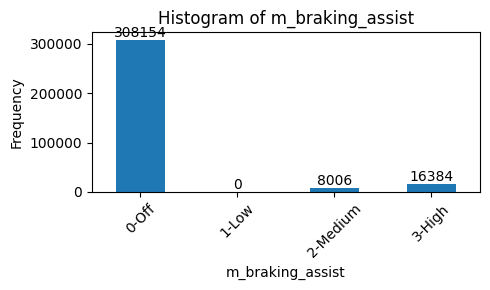

In [30]:
# Get unique values and sort them
unique_values = np.sort(df_weather['m_braking_assist'].unique())
print("m_braking_assist - categories found:", unique_values)

# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-Low",
    2: "2-Medium",
    3: "3-High"
}

# Set the figure size
fig = plt.figure(figsize=(5, 3))

# Count the occurrences of each category and sort by index
category_counts = df_weather['m_braking_assist'].value_counts().sort_index()

# Add any missing categories with 0 count
for category in category_mapping.keys():
    if category not in category_counts.index:
        category_counts[category] = 0

# Re-sort the categories after adding missing ones
category_counts = category_counts.sort_index()

# Plot the bar chart
ax = category_counts.plot(kind='bar')

# Label x and y axes
plt.xlabel('m_braking_assist')
plt.ylabel('Frequency')
plt.title('Histogram of m_braking_assist')

# Create a list of labels using the category mapping
xticklabels = [category_mapping[category] for category in category_counts.index]

# Set the x-tick labels
ax.set_xticklabels(xticklabels)

# Rotate the labels for better readability
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [31]:
# Create a function so we can reuse easily

def bar_plot(df_in,col_name,category_mapping):      # df_in input dataframe, col_name column name, category_mapping dictionary

    # Get unique values and sort them
    unique_values = np.sort(df_in[col_name].unique())
    print(col_name,"- categories found:", unique_values,"\n")   # to debug

    # Get value counts and percentage
    value_counts = df_in[col_name].value_counts().sort_index()
    percentages = (value_counts / value_counts.sum()) * 100

    # Combine value counts and percentages into a DataFrame
    display(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))

    # Set the figure size
    fig = plt.figure(figsize=(9, 4))

    # Count the occurrences of each category and sort by index
    category_counts = df_in[col_name].value_counts().sort_index()

    # Add any missing categories with 0 count
    for category in category_mapping.keys():
        if category not in category_counts.index:
            category_counts[category] = 0

    # Re-sort the categories after adding missing ones
    category_counts = category_counts.sort_index()

    # Plot the bar chart
    ax = category_counts.plot(kind='bar')

    # Label x and y axes
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of '+ col_name)

    # Create a list of labels using the category mapping
    xticklabels = [category_mapping[category] for category in category_counts.index]

    # Set the x-tick labels
    ax.set_xticklabels(xticklabels)

    # Rotate the labels for better readability
    plt.xticks(rotation=45)

    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Ensure layout is tight to avoid clipping
    plt.tight_layout()
    plt.show()




m_braking_assist - categories found: [0 2 3] 



,Count,Percentage
m_braking_assist,,
0,308154,92.665632
2,8006,2.407501
3,16384,4.926867


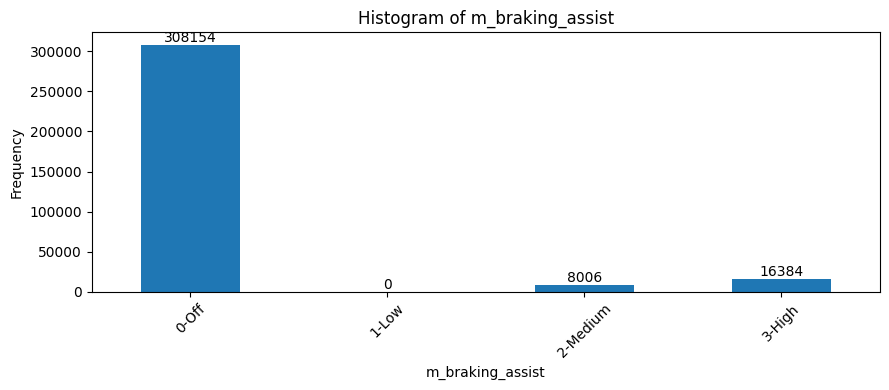

In [32]:
# Debug the function bar_plot

# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-Low",
    2: "2-Medium",
    3: "3-High"
}

bar_plot(df_weather,'m_braking_assist',category_mapping)

#### Gearbox assist ####

In [33]:
# Get value counts and percentage
value_counts = df_weather['m_gearbox_assist'].value_counts().sort_index()
percentages = (value_counts / value_counts.sum()) * 100

# Combine value counts and percentages into a DataFrame
display(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))

,Count,Percentage
m_gearbox_assist,,
1,304814,91.661254
3,27730,8.338746


m_gearbox_assist - categories found: [1 3] 



,Count,Percentage
m_gearbox_assist,,
1,304814,91.661254
3,27730,8.338746


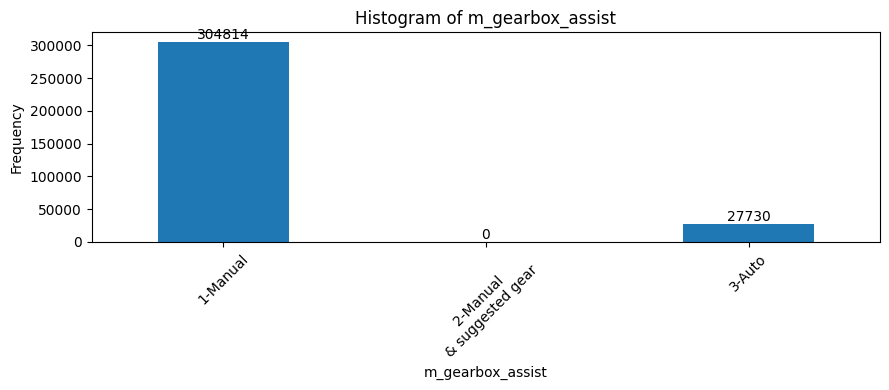

In [34]:
# Define category mapping
category_mapping = {
    1: "1-Manual",
    2: "2-Manual \n& suggested gear",
    3: "3-Auto"
}

bar_plot(df_weather,'m_gearbox_assist',category_mapping)

#### ERS Assist ####

m_ersassist - categories found: [0 1] 



,Count,Percentage
m_ersassist,,
0,304814,91.661254
1,27730,8.338746


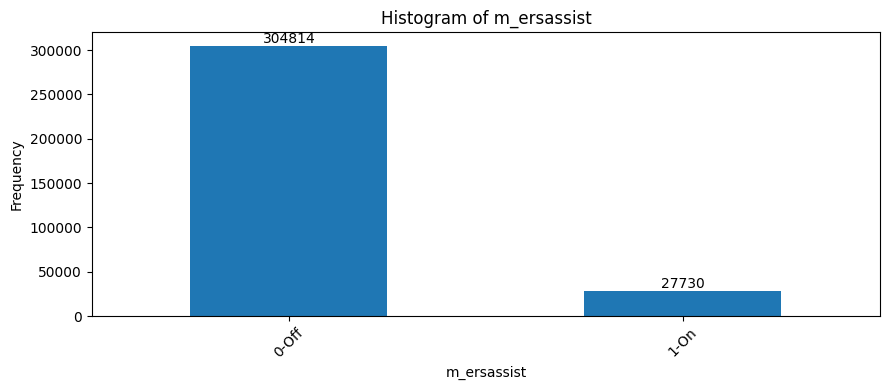

In [35]:
# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-On",
}

bar_plot(df_weather,'m_ersassist',category_mapping)

#### Steering Assist ####

m_steering_assist - categories found: [0 1] 



,Count,Percentage
m_steering_assist,,
0,317274,95.408126
1,15270,4.591874


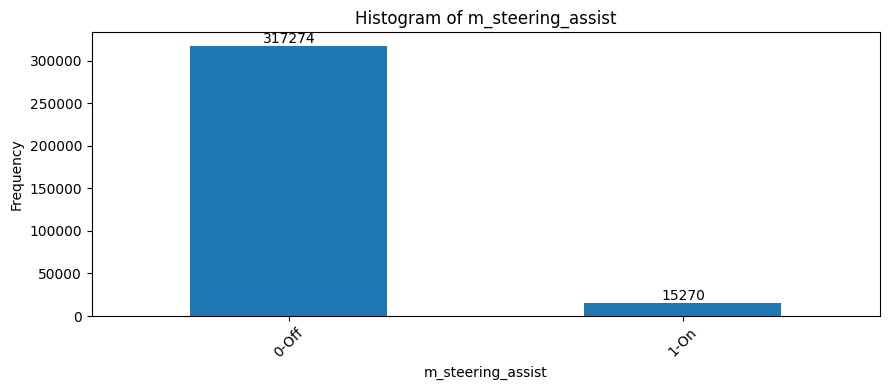

In [36]:
# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-On",
}

bar_plot(df_weather,'m_steering_assist',category_mapping)

#### DRS Assist ####

m_drsassist - categories found: [0 1] 



,Count,Percentage
m_drsassist,,
0,304814,91.661254
1,27730,8.338746


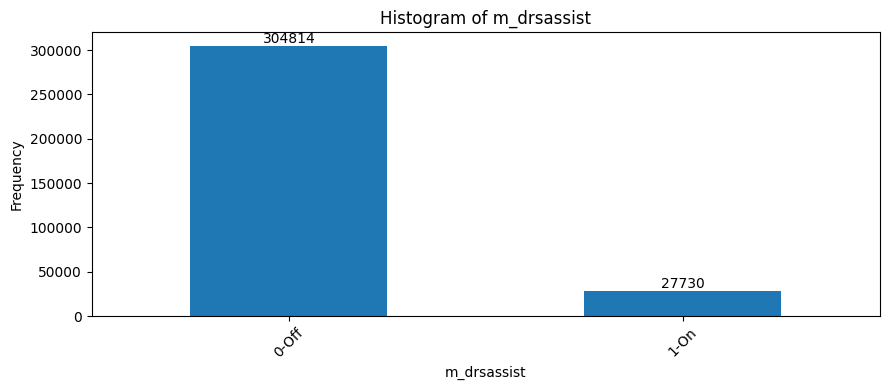

In [37]:
# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-On",
}

bar_plot(df_weather,'m_drsassist',category_mapping)

#### Correlation Analysis driver/car assist ####

In [ ]:
# Funtion that will plot correlation matrix for certain columns in a given df_in

def plot_correlation_matrix(df_in, selected_columns):
    df_selected = df_in[selected_columns]

    # Computing correlation matrix
    correlation_matrix = df_selected.corr()

    # Display correlation table
    print("Correlation Table:")
    print(correlation_matrix)

    # Plotting heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()







Correlation Table:
                   m_braking_assist  m_gearbox_assist  m_ersassist  \
m_braking_assist            1.00000          0.917580     0.917580   
m_gearbox_assist            0.91758          1.000000     1.000000   
m_ersassist                 0.91758          1.000000     1.000000   
m_steering_assist           0.86882          0.727352     0.727352   
m_drsassist                 0.91758          1.000000     1.000000   

                   m_steering_assist  m_drsassist  
m_braking_assist            0.868820     0.917580  
m_gearbox_assist            0.727352     1.000000  
m_ersassist                 0.727352     1.000000  
m_steering_assist           1.000000     0.727352  
m_drsassist                 0.727352     1.000000  


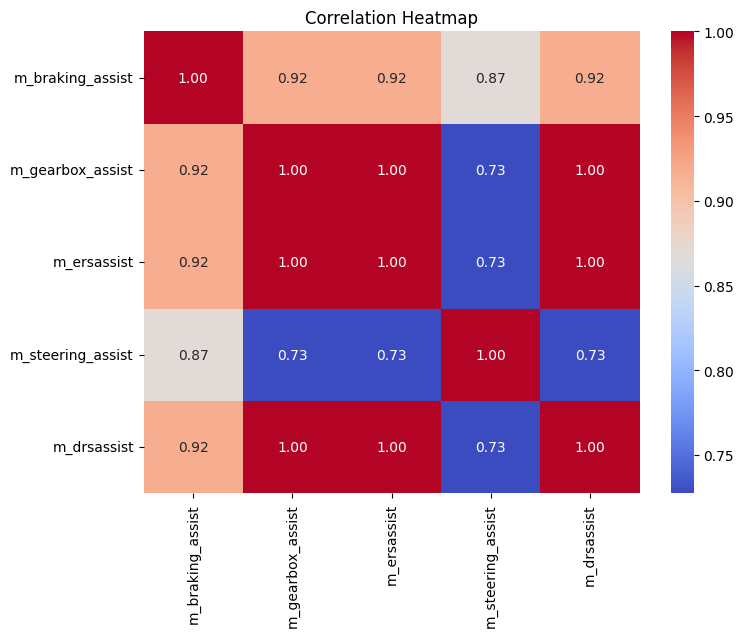

In [159]:
selected_columns = ['m_braking_assist', 'm_gearbox_assist', 'm_ersassist', 'm_steering_assist', 'm_drsassist']
plot_correlation_matrix(df_weather, selected_columns)

#### **Pit related** ####

|Column|Description|Notes|
|---|---|---|
|m_pit_assist                    |0 = off, 1 = on| Binary|
|m_pit_release_assist            |0 = off, 1 = on| Binary|
|m_pit_stop_window_ideal_lap     |Ideal lap to pit on for current strategy (player)| Quantitative|
|m_pit_stop_window_latest_lap    |Latest lap to pit on for current strategy (player)| Quantitatve|
|m_pit_stop_rejoin_position      |Predicted position to rejoin at (player)| Ordinal|
|m_pit_speed_limit               |Pit speed limit in kilometres per hour|  Quantitative variable|


#### Pit Assist ####

m_pit_assist - categories found: [0 1] 



,Count,Percentage
m_pit_assist,,
0,304814,91.661254
1,27730,8.338746


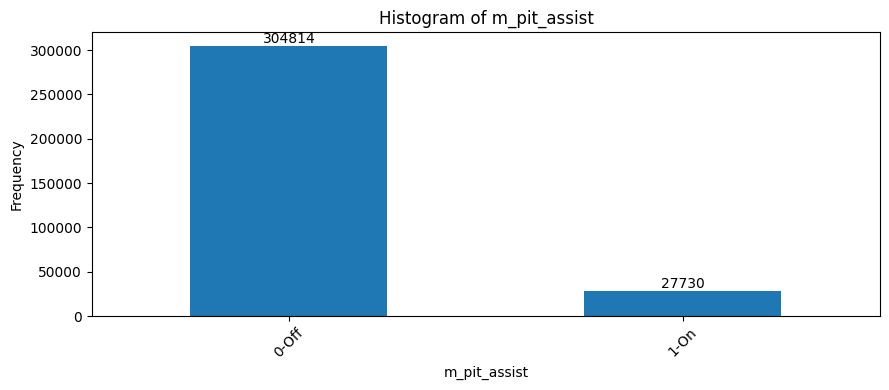

In [186]:
# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-On",
}

bar_plot(df_weather,'m_pit_assist',category_mapping)

#### Put release assist ####

m_pit_release_assist - categories found: [0 1] 



,Count,Percentage
m_pit_release_assist,,
0,304814,91.661254
1,27730,8.338746


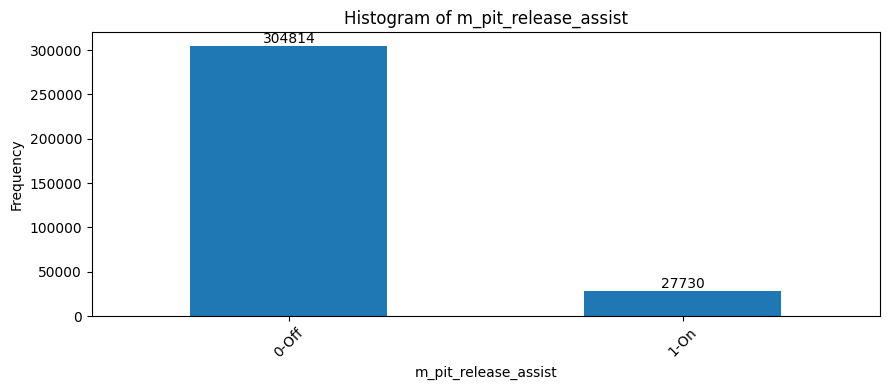

In [187]:
# Define category mapping
category_mapping = {
    0: "0-Off",
    1: "1-On",
}

bar_plot(df_weather,'m_pit_release_assist',category_mapping)

#### Pit Stop Window Ideal Lap ####

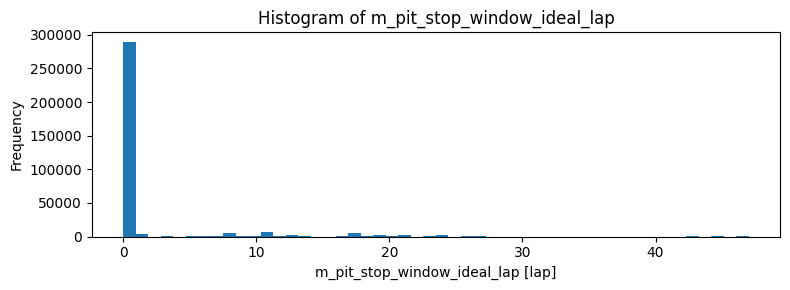

count    332544.000000
mean          1.919202
std           5.964609
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          47.000000
Name: m_pit_stop_window_ideal_lap, dtype: float64

In [103]:
# Create a function to reuse

# Plot histogram
def plot_histogram(col_name, df, unit=None, number_bins=None):

    fig = plt.figure(figsize=(8, 3))
    if number_bins==None:
        plt.hist(df[col_name])
    else:
        plt.hist(df[col_name],bins=number_bins)
        
    if unit != None:
        label_x = col_name+" ["+unit+"]"
    else:
        label_x = col_name
    plt.xlabel(label_x)
    plt.ylabel('Frequency')

    plt.title('Histogram of '+col_name)

    plt.tight_layout()
    plt.show()

    display(df[col_name].describe())

plot_histogram('m_pit_stop_window_ideal_lap',df_weather, unit="lap", number_bins=50)

#### Pit Stop Window Latest Lap ####

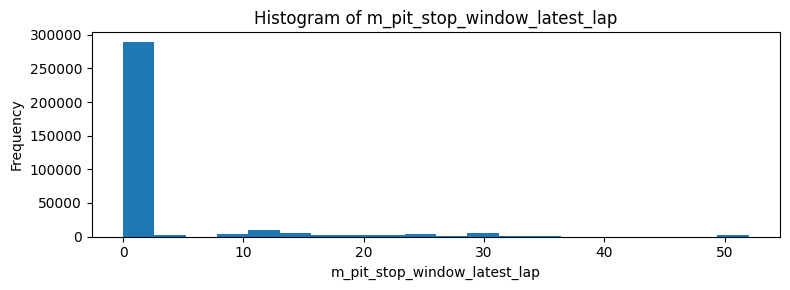

count    332544.000000
mean          2.500466
std           7.443051
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: m_pit_stop_window_latest_lap, dtype: float64

In [110]:
# Plot histogram

plot_histogram('m_pit_stop_window_latest_lap',df_weather,number_bins=20)

#### Pit stop rejoin position ####

,Count,Percentage
m_pit_stop_rejoin_position,,
0,274064,82.414357
1,3590,1.079556
2,3021,0.908451
3,3114,0.936417
4,1079,0.324468
5,1087,0.326874
6,1529,0.459789
7,839,0.252297
8,766,0.230345


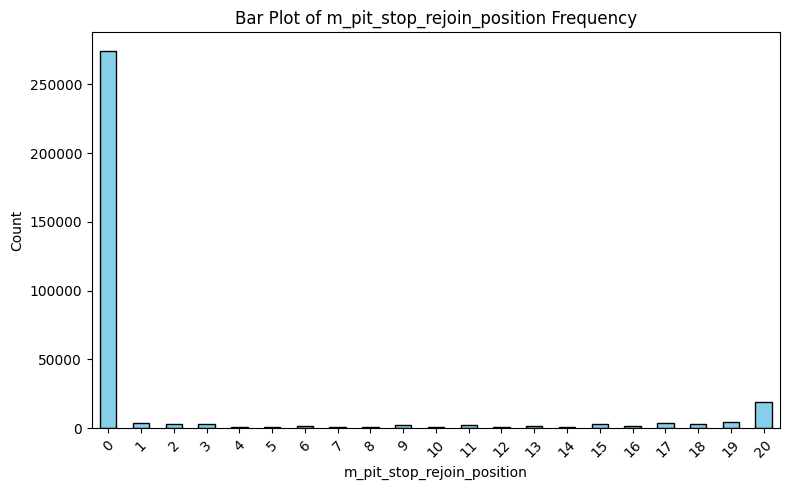

In [112]:
# Create a function to reuse for similar case of ordinal

def plot_ordinal_bars(col_name, df):
    # Get value counts and percentage
    value_counts = df[col_name].value_counts().sort_index()
    percentages = (value_counts / value_counts.sum()) * 100

    # Combine value counts and percentages into a DataFrame
    display(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    # Combine value counts and percentages into a DataFrame
    df_counts = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    df_counts['Count'].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

    # Add labels
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    ax.set_title('Bar Plot of '+col_name+' Frequency')

    # Rotate x-axis labels for readability
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45)

    plt.tight_layout()
    plt.show()

plot_ordinal_bars('m_pit_stop_rejoin_position', df_weather)

#### Pit Speed Limit ####

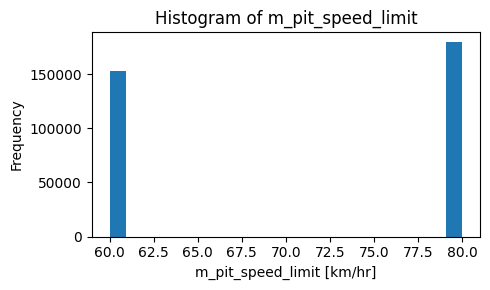

count    332544.000000
mean         70.802901
std           9.967730
min          60.000000
25%          60.000000
50%          80.000000
75%          80.000000
max          80.000000
Name: m_pit_speed_limit, dtype: float64

In [69]:
# Plot histogram

plot_histogram('m_pit_speed_limit',df_weather,unit="km/hr")

#### Correlation Matrix for Pit Stop related columns ####

Correlation Table:
                              m_pit_assist  m_pit_release_assist  \
m_pit_assist                      1.000000              1.000000   
m_pit_release_assist              1.000000              1.000000   
m_pit_stop_window_ideal_lap       0.046209              0.046209   
m_pit_stop_window_latest_lap      0.040047              0.040047   
m_pit_stop_rejoin_position        0.172077              0.172077   
m_pit_speed_limit                 0.108528              0.108528   

                              m_pit_stop_window_ideal_lap  \
m_pit_assist                                     0.046209   
m_pit_release_assist                             0.046209   
m_pit_stop_window_ideal_lap                      1.000000   
m_pit_stop_window_latest_lap                     0.971696   
m_pit_stop_rejoin_position                       0.552935   
m_pit_speed_limit                               -0.100129   

                              m_pit_stop_window_latest_lap  \
m_pit_assist  

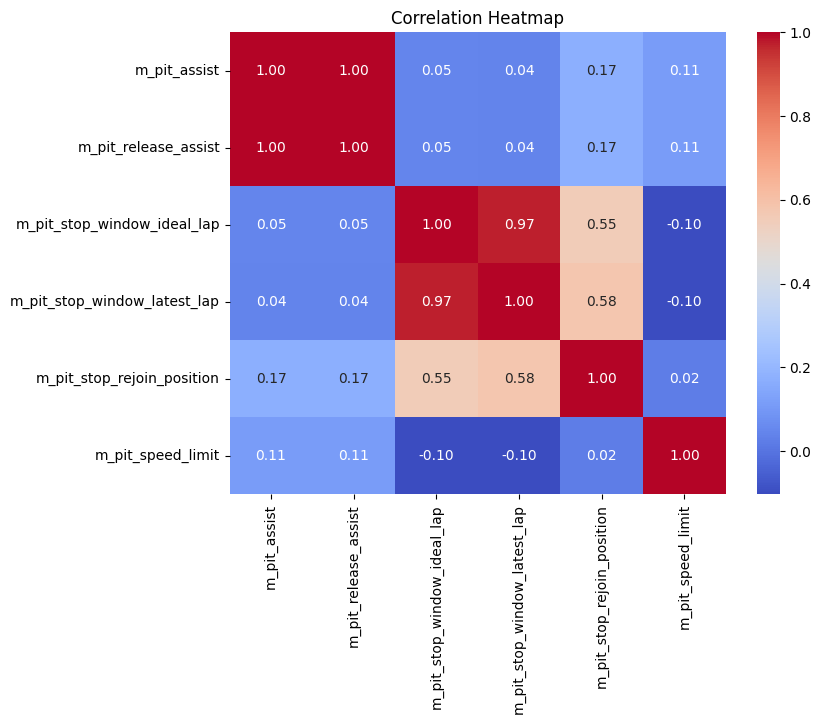

In [184]:
# Selecting specific columns for correlation analysis
selected_columns = ['m_pit_assist', 'm_pit_release_assist', 'm_pit_stop_window_ideal_lap', 'm_pit_stop_window_latest_lap', 'm_pit_stop_rejoin_position', 'm_pit_speed_limit']

plot_correlation_matrix(df_weather, selected_columns)

#### **Session related** ####
|Column|Description|Notes|
|---|---|---|
|m_session_type|0 = unknown, 1 = P1, 2 = P2, 3 = P3, 4 = Short P, 5 = Q1, 6 = Q2, 7 = Q3, <br/>8 = Short Q, 9 = OSQ, 10 = R, 11 = R2, 12 = R3, 13 = Time Trial|Categorical but some sub-categories can be seen as ordinal,<br/> like Practice -> Qualifying :: P1->P2->P3 then Q1->Q2->Q3 |
|m_session_link_identifier|Identifier for season - persists across saves|Assumed to be some sort of index or key|
|m_session_time_left|Time left in session in seconds|Quantitative|
|m_session_duration |Session duration in seconds|Quantitative|

#### Session type ####

m_session_type - categories found: [ 1  2  3  5  6  7  8  9 10 13] 



,Count,Percentage
m_session_type,,
1,13046,3.923090
2,7,0.002105
3,11,0.003308
5,6880,2.068899
6,6298,1.893885
7,5112,1.537240
8,158851,47.768416
9,3458,1.039862
10,59607,17.924545


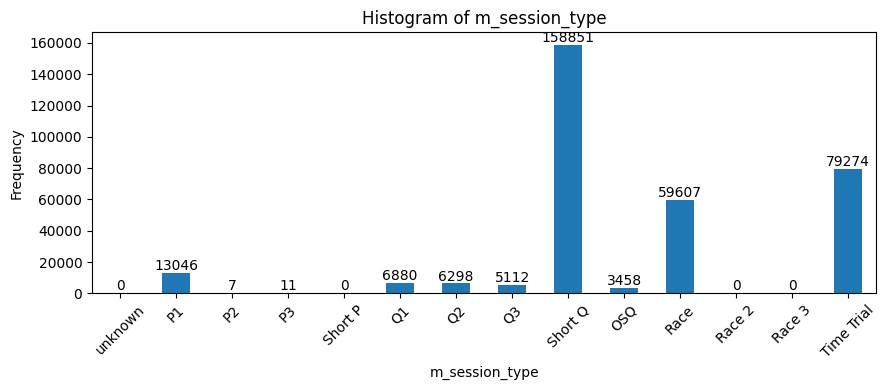

In [122]:
# Define category mapping
category_mapping = {
    0 : 'unknown', 
    1 : 'P1', 
    2 : 'P2', 
    3 : 'P3', 
    4 : 'Short P', 
    5 : 'Q1', 
    6 : 'Q2', 
    7 : 'Q3', 
    8 : 'Short Q', 
    9 : 'OSQ', 
    10 : 'Race', 
    11 : 'Race 2', 
    12 : 'Race 3', 
    13 : 'Time Trial'
}


bar_plot(df_weather,'m_session_type',category_mapping)

#### Session Link Identifier ####

m_session_link_identifier       | Identifier for session - persists across save

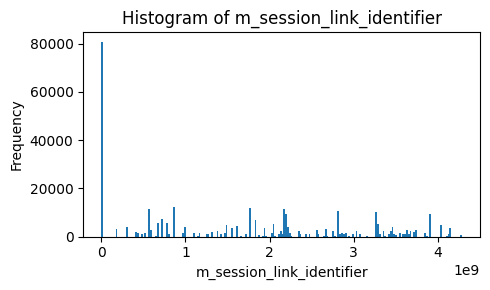

In [153]:
# Plot histogram

fig = plt.figure(figsize=(5, 3))
plt.hist(df_weather['m_session_link_identifier'],bins=200)
plt.xlabel('m_session_link_identifier')
plt.ylabel('Frequency')
plt.title('Histogram of m_session_link_identifier')

plt.tight_layout()
plt.show()

In [154]:
# Quantity for zero looks very high and base on the definition of the column it could mean that the value is not available or not applicable
# Lets check the count of zero vs greater than zero in column 'm_session_link_identifier'
# Count of zero vs greater than zero in column 'm_session_link_identifier'
count_zero = (df_weather['m_session_link_identifier'] == 0).sum()
count_greater_than_zero = (df_weather['m_session_link_identifier'] > 0).sum()


print(f"Count equal zero: {count_zero}\tPercentage: {count_zero / (count_zero + count_greater_than_zero) * 100:.2f}%")
print(f"Count of > zero: {count_greater_than_zero}\tPercentage: {count_greater_than_zero / (count_zero + count_greater_than_zero) * 100:.2f}%")

Count equal zero: 79274	Percentage: 23.84%
Count of > zero: 253270	Percentage: 76.16%


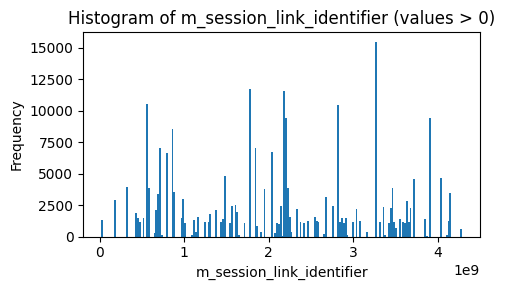

In [155]:
# Plot again but removing zero
# Filter the data for 'm_session_link_identifier' > 0
filtered_data = df_weather[df_weather['m_session_link_identifier'] > 0]

# Plot the histogram
fig = plt.figure(figsize=(5, 3))
plt.hist(filtered_data['m_session_link_identifier'], bins=200)
plt.xlabel('m_session_link_identifier')
plt.ylabel('Frequency')
plt.title('Histogram of m_session_link_identifier (values > 0)')

plt.tight_layout()
plt.show()

#### Session time left ####

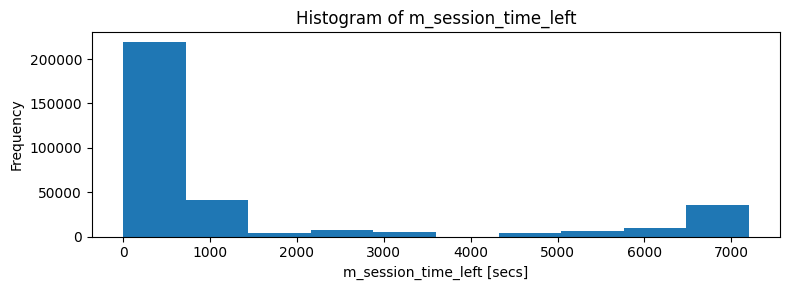

count    332544.000000
mean       1448.725567
std        2337.355498
min           0.000000
25%           1.000000
50%         353.000000
75%         976.000000
max        7200.000000
Name: m_session_time_left, dtype: float64

In [113]:
# Plot histogram

plot_histogram('m_session_time_left', df_weather,unit="secs")

#### Session duration ####

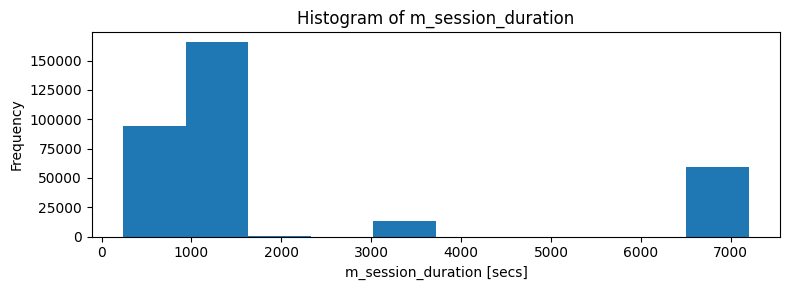

count    332544.000000
mean       2143.238308
std        2428.033471
min         240.000000
25%         720.000000
50%        1080.000000
75%        1080.000000
max        7200.000000
Name: m_session_duration, dtype: float64

In [114]:
# Plot histogram

plot_histogram('m_session_duration', df_weather, unit="secs")

#### Relation between Session type .vs. Session duration ####

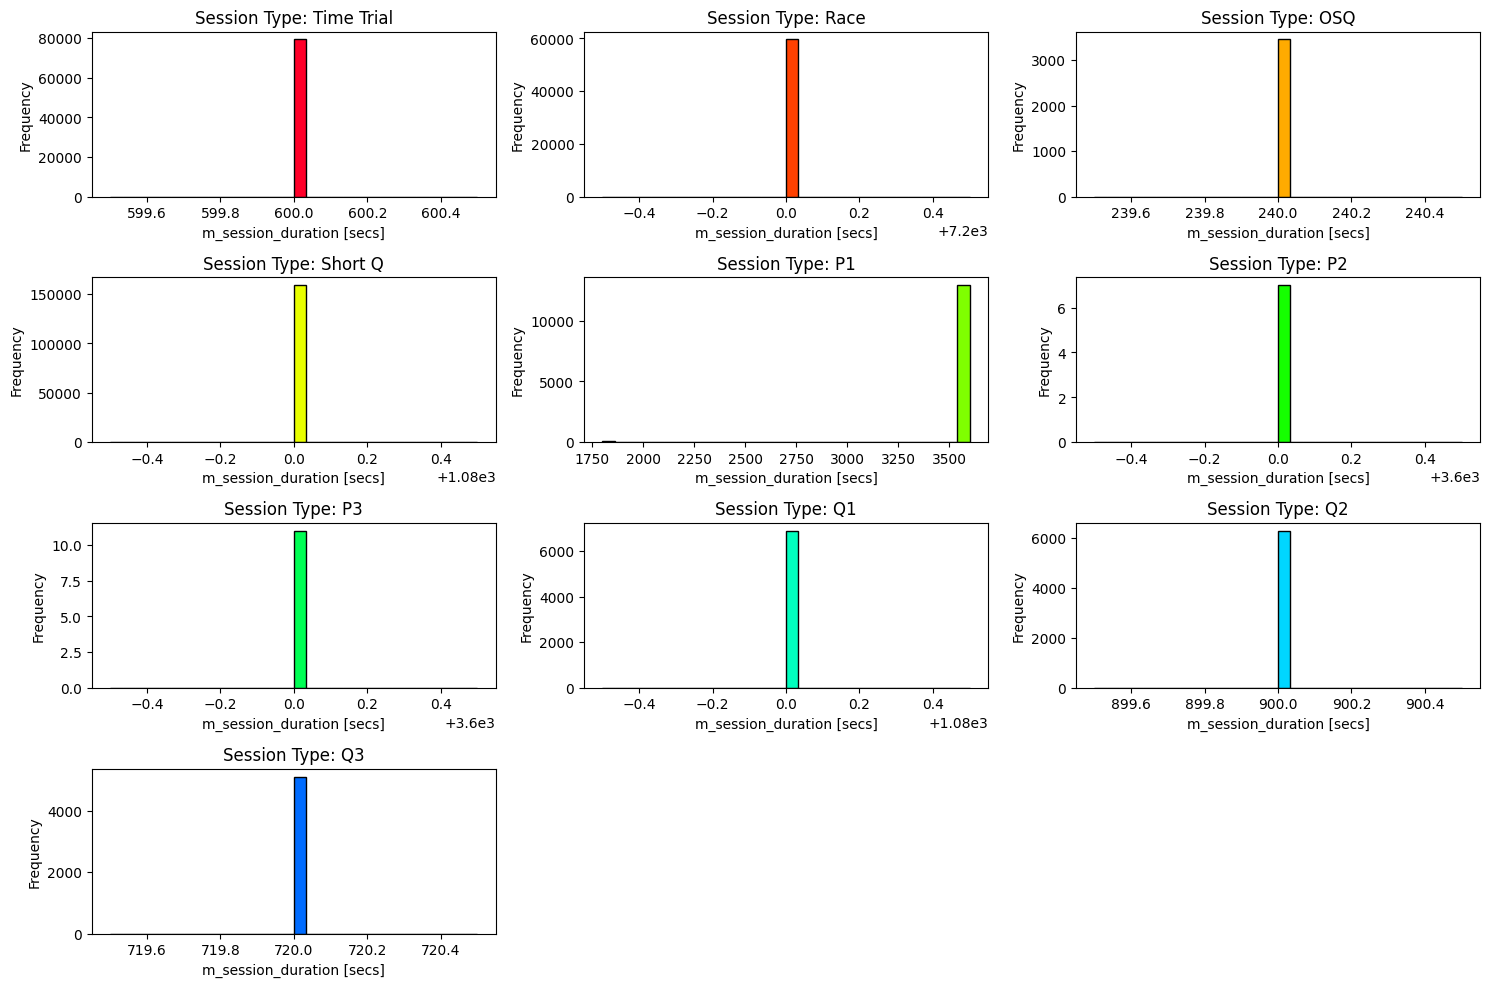

In [180]:
# Looks like there are multiple distributions (or peaks) within session duration
# So, I look at session duration per session type

# Define category mapping
category_mapping = {
    0: 'Unknown', 
    1: 'P1', 2: 'P2', 3: 'P3', 4: 'Short P', 
    5: 'Q1', 6: 'Q2', 7: 'Q3', 8: 'Short Q', 9: 'OSQ', 
    10: 'Race', 11: 'Race 2', 12: 'Race 3', 
    13: 'Time Trial'}

# Use pyplot.get_cmap() to get the colormap
colormap = plt.get_cmap('gist_rainbow', len(category_mapping))  # Choose the colormap

# Get unique session types
session_types = df_weather['m_session_type'].unique()
num_types = len(session_types)

# Define grid size (4x4)
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through session types and plot histograms
for i, session_type in enumerate(session_types):
    subset = df_weather[df_weather['m_session_type'] == session_type]
    axes[i].hist(subset['m_session_duration'], bins=30, color=colormap(i), edgecolor='black')
    axes[i].set_title(f'Session Type: {category_mapping[session_type]}')
    axes[i].set_xlabel('m_session_duration' + ' [secs]')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Session type vs. Session time left ####

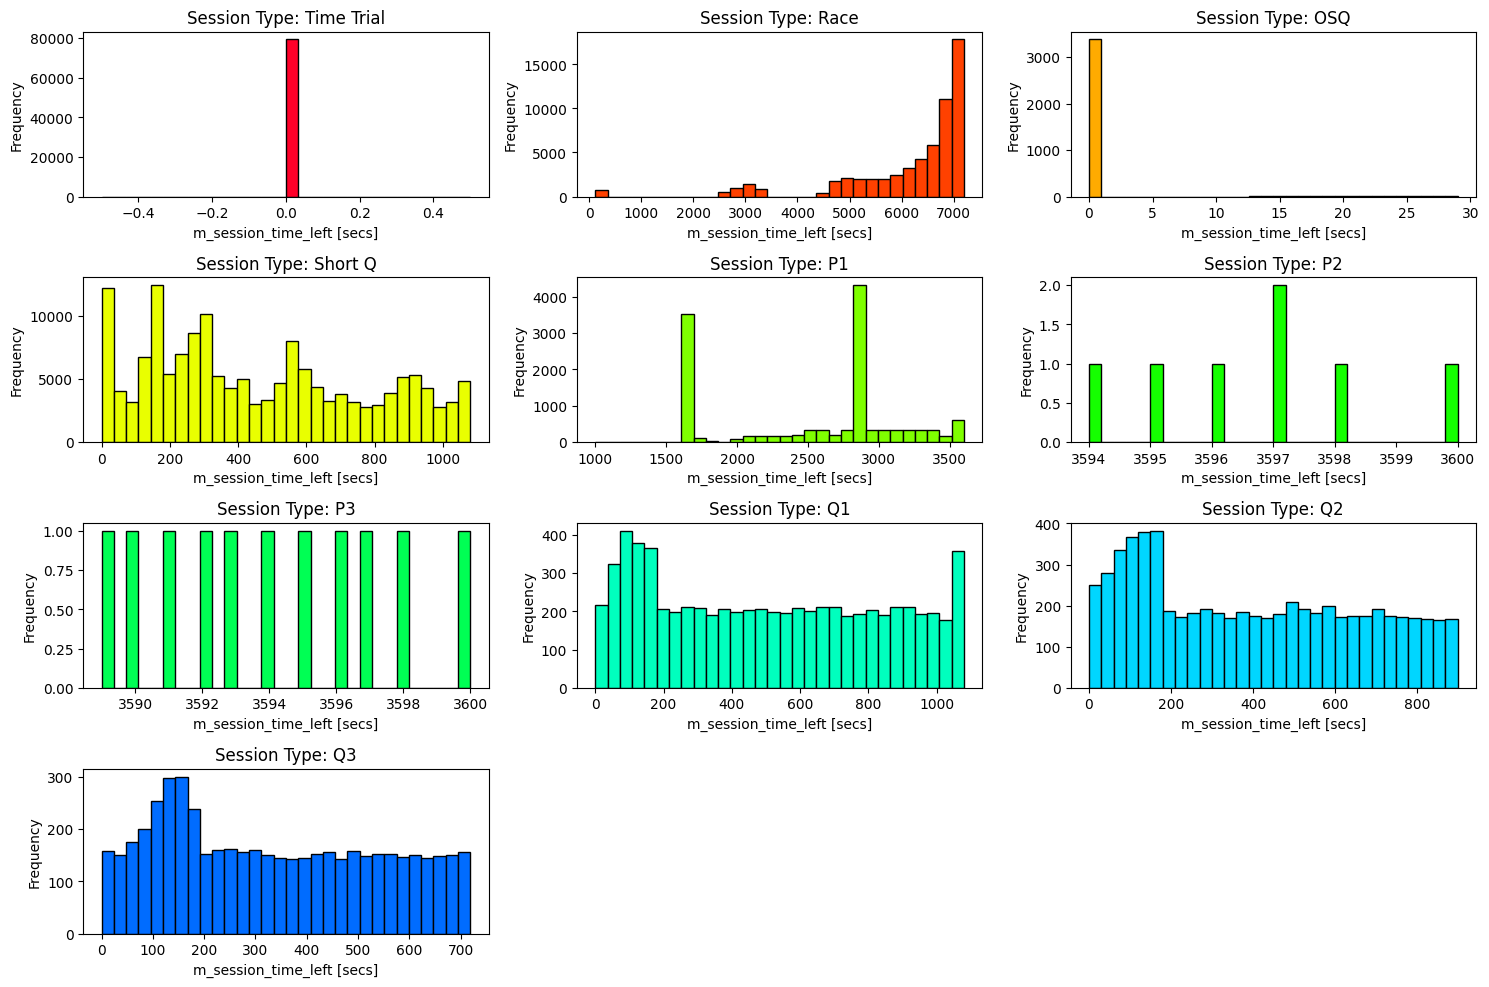

In [152]:
# Looks like there are multiple distributions (or peaks) within session time left
# So, I look at session time left per session type

# Define category mapping
category_mapping = {
    0: 'Unknown', 
    1: 'P1', 2: 'P2', 3: 'P3', 4: 'Short P', 
    5: 'Q1', 6: 'Q2', 7: 'Q3', 8: 'Short Q', 9: 'OSQ', 
    10: 'Race', 11: 'Race 2', 12: 'Race 3', 
    13: 'Time Trial'}

# Use pyplot.get_cmap() to get the colormap
colormap = plt.get_cmap('gist_rainbow', len(category_mapping))  # Choose the colormap

# Get unique session types
session_types = df_weather['m_session_type'].unique()
num_types = len(session_types)

# Define grid size (4x4)
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through session types and plot histograms
for i, session_type in enumerate(session_types):
    subset = df_weather[df_weather['m_session_type'] == session_type]
    axes[i].hist(subset['m_session_time_left'], bins=30, color=colormap(i), edgecolor='black')
    axes[i].set_title(f'Session Type: {category_mapping[session_type]}')
    axes[i].set_xlabel('m_session_time_left' + ' [secs]')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Session type .vs. Session identifier ####

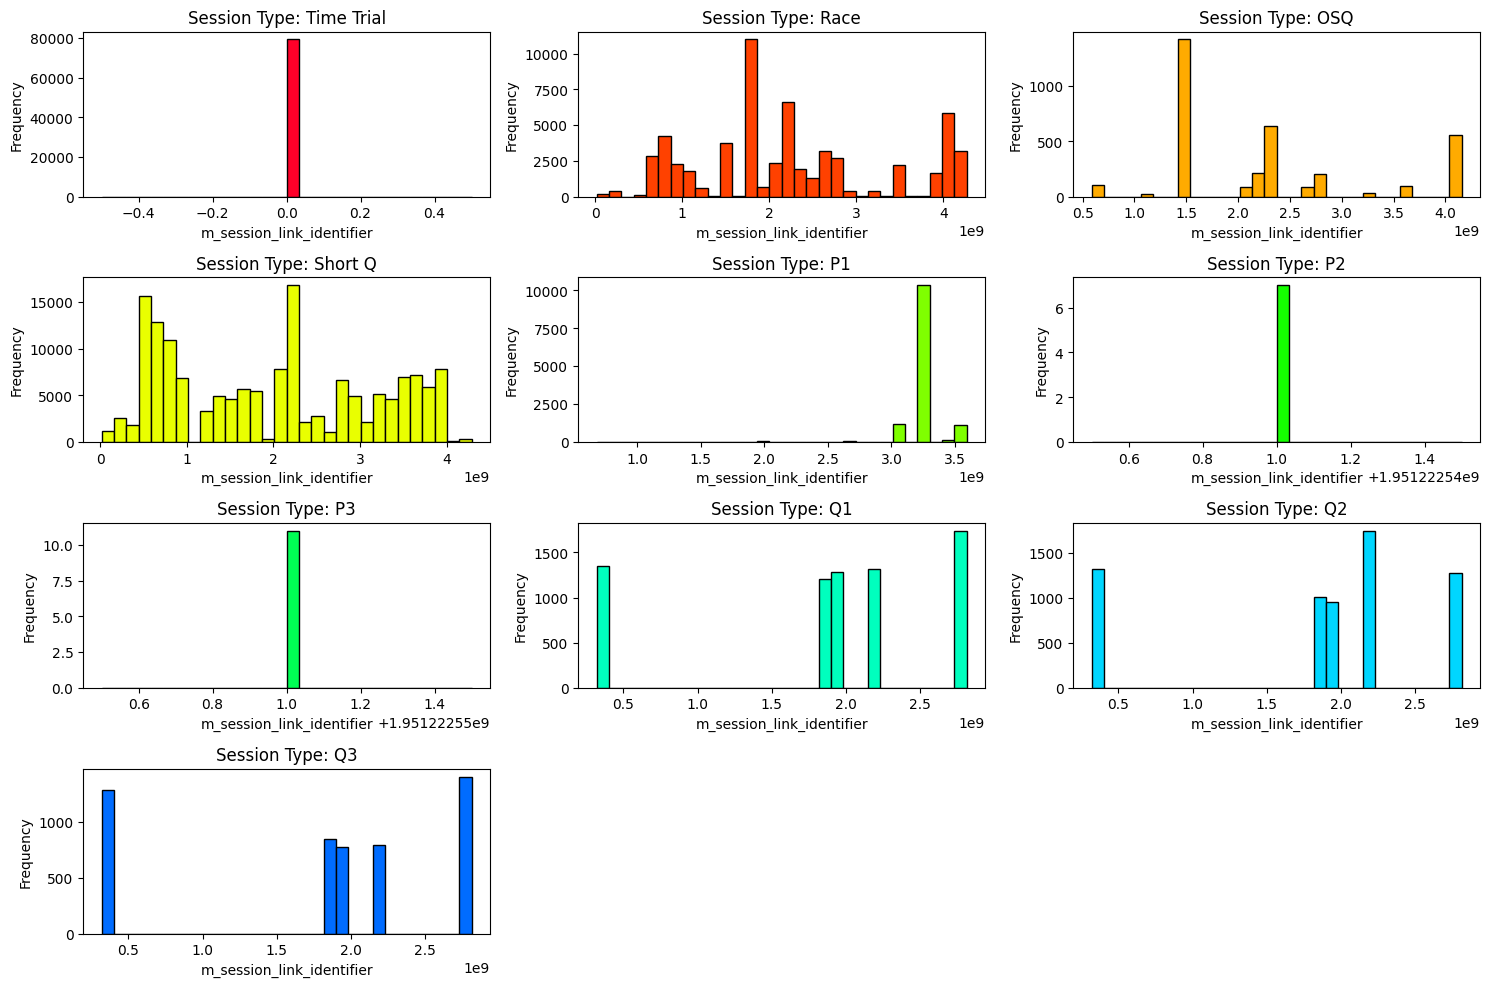

In [156]:
# Define category mapping
category_mapping = {
    0: 'Unknown', 
    1: 'P1', 2: 'P2', 3: 'P3', 4: 'Short P', 
    5: 'Q1', 6: 'Q2', 7: 'Q3', 8: 'Short Q', 9: 'OSQ', 
    10: 'Race', 11: 'Race 2', 12: 'Race 3', 
    13: 'Time Trial'}

# Use pyplot.get_cmap() to get the colormap
colormap = plt.get_cmap('gist_rainbow', len(category_mapping))  # Choose the colormap

# Get unique session types
session_types = df_weather['m_session_type'].unique()
num_types = len(session_types)

# Define grid size (4x4)
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through session types and plot histograms
for i, session_type in enumerate(session_types):
    subset = df_weather[df_weather['m_session_type'] == session_type]
    axes[i].hist(subset['m_session_link_identifier'], bins=30, color=colormap(i), edgecolor='black')
    axes[i].set_title(f'Session Type: {category_mapping[session_type]}')
    axes[i].set_xlabel('m_session_link_identifier')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation Matrix for Session related columns ####

Correlation Table:
                           m_session_type  m_session_link_identifier  \
m_session_type                   1.000000                  -0.591263   
m_session_link_identifier       -0.591263                   1.000000   
m_session_time_left             -0.036654                   0.317623   
m_session_duration              -0.046184                   0.316684   

                           m_session_time_left  m_session_duration  
m_session_type                       -0.036654           -0.046184  
m_session_link_identifier             0.317623            0.316684  
m_session_time_left                   1.000000            0.965228  
m_session_duration                    0.965228            1.000000  


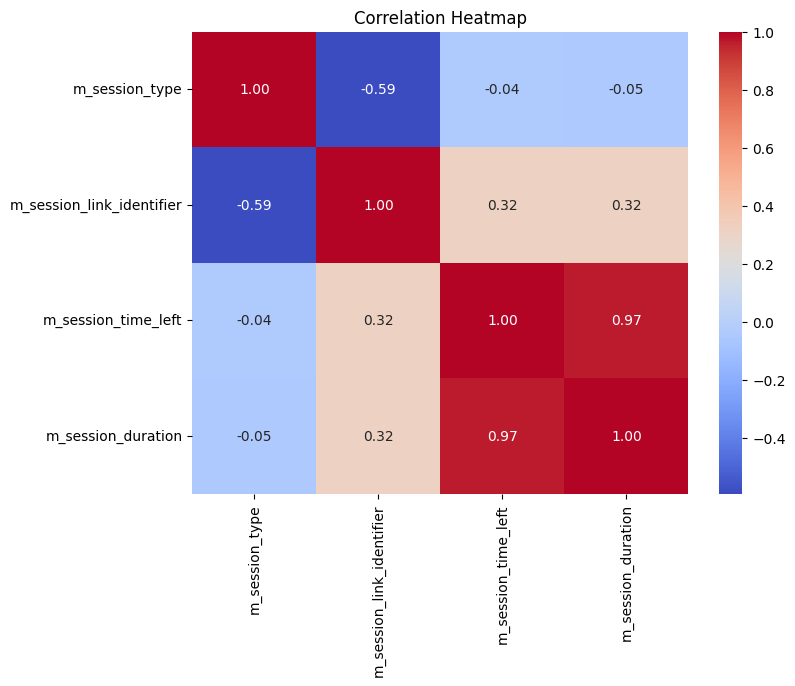

In [161]:
# Selecting specific columns for correlation analysis
selected_columns = ['m_session_type', 'm_session_link_identifier', 'm_session_time_left', 'm_session_duration']

plot_correlation_matrix(df_weather, selected_columns)

#### timestamp ####

timestamp | timestamp for when the packet was received

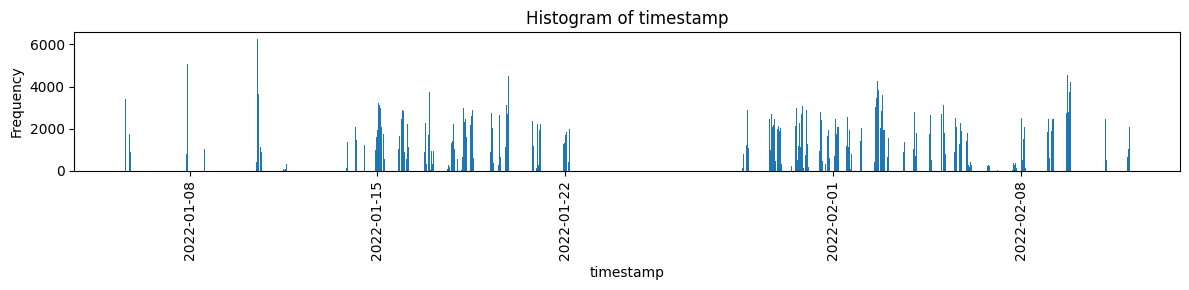

In [115]:
# Plot histogram

fig = plt.figure(figsize=(12, 3))
plt.hist(df_weather['timestamp'],bins=1000)     # increasing bins to see the "buckets"
plt.xlabel('timestamp')
plt.ylabel('Frequency')
plt.title('Histogram of timestamp')

# rotate labels for a better view
plt.xticks(rotation=90, ha="center")

plt.tight_layout()
plt.show()

In [116]:
# Group by day (mm-dd-yyyy format) and count occurrences
daily_counts = df_weather.groupby(df_weather['timestamp'].dt.strftime('%m-%d-%Y')).size()

# Display the counts
print(daily_counts)

timestamp
01-05-2022     6053
01-07-2022     5872
01-08-2022     1026
01-10-2022    12332
01-11-2022      511
01-13-2022     1494
01-14-2022     7726
01-15-2022    26692
01-16-2022    13074
01-17-2022     9254
01-18-2022    18284
01-19-2022    20993
01-20-2022     5921
01-21-2022     7920
01-22-2022     5074
01-28-2022     6071
01-29-2022    18866
01-30-2022    21306
01-31-2022    13869
02-01-2022    16787
02-02-2022    28891
02-03-2022     6242
02-04-2022     9479
02-05-2022    22090
02-06-2022     2232
02-07-2022     1349
02-08-2022     8084
02-09-2022    28280
02-11-2022     4684
02-12-2022     2088
dtype: int64


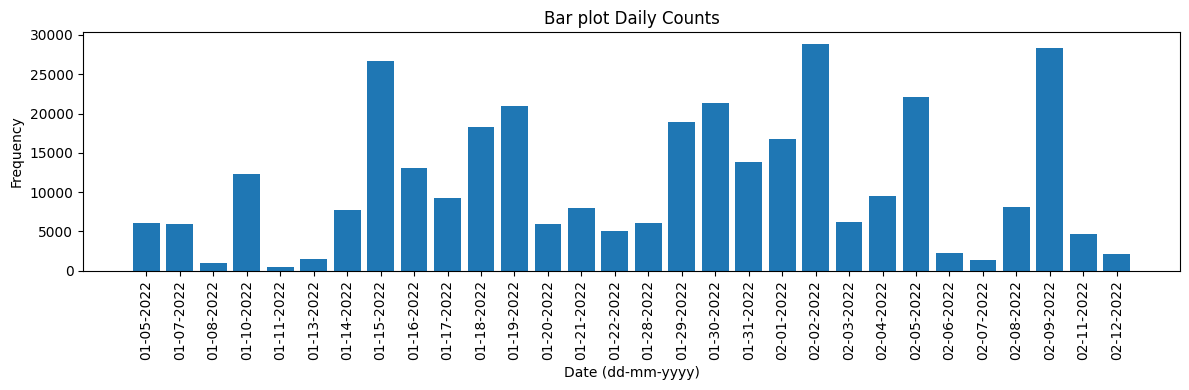

In [117]:
# Bar plot using format mm-dd-yyyy
fig = plt.figure(figsize=(12, 4))
plt.bar(daily_counts.index, daily_counts.values)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='center')

# Labels and title
plt.xlabel('Date (dd-mm-yyyy)')
plt.ylabel('Frequency')
plt.title('Bar plot Daily Counts')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

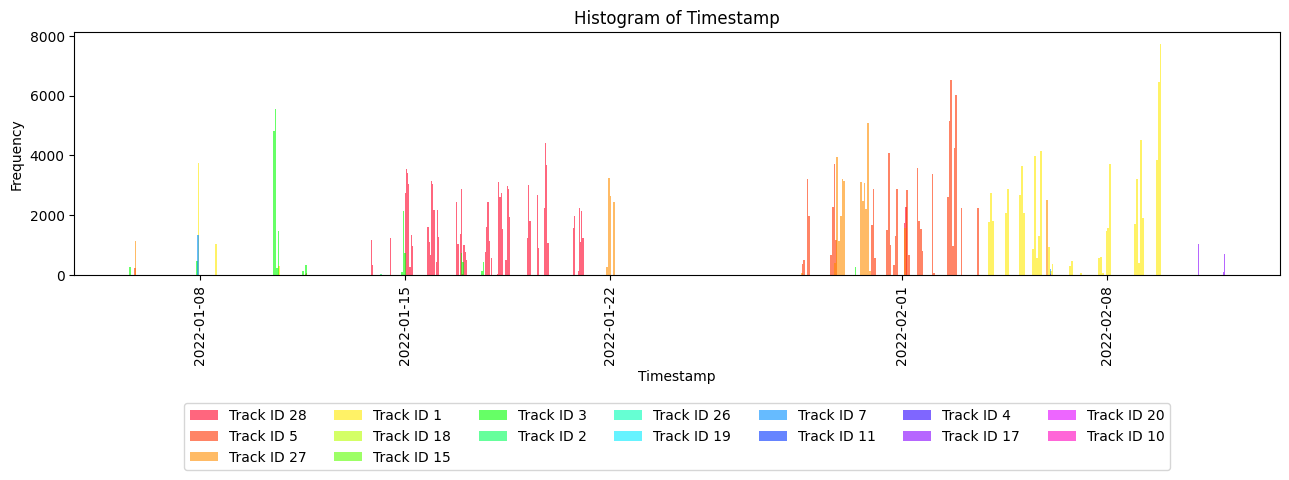

In [118]:

# Create the figure
fig = plt.figure(figsize=(13, 6))

# Set the number of bins
bins = 500

# Get unique m_track_id values
unique_track_ids = df_weather['m_track_id'].unique()

# Use pyplot.get_cmap() to get the colormap
colormap = plt.get_cmap('gist_rainbow', len(unique_track_ids))  # Choose the colormap

# Plot the histogram for each m_track_id group with different colors
for i, track_id in enumerate(unique_track_ids):
    subset = df_weather[df_weather['m_track_id'] == track_id]
    plt.hist(subset['timestamp'], bins=bins, alpha=0.6, color=colormap(i), label=f'Track ID {track_id}')

# Labels and title
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamp')

# Rotate labels for better readability
plt.xticks(rotation=90, ha="center")

# Add a legend
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

#### **Track related** ####


|Column|Description|Notes|
|---|---|---|
|m_track_id                      |-1 for unknown, 0-21 for tracks |Categorical|
|m_track_temperature             |Track temp. in degrees celsius|Quantitative|
|m_track_length                  |Track length in metres|Quantitative|
|m_num_marshal_zones             |Number of marshal zones to follow |Quantitative|
|m_safety_car_status             |0 = no safety car, 1 = full, 2 = virtual, 3 = formation lap|Categorical|
|m_total_laps                    |Total number of laps in this race|Quantitative|

#### Track ID ####

,Count,Percentage
m_track_id,,
1,75397,22.672789
2,3546,1.066325
3,18093,5.440784
4,2,0.000601
5,74798,22.492663
7,1525,0.458586
10,106,0.031875
11,1112,0.334392
15,344,0.103445


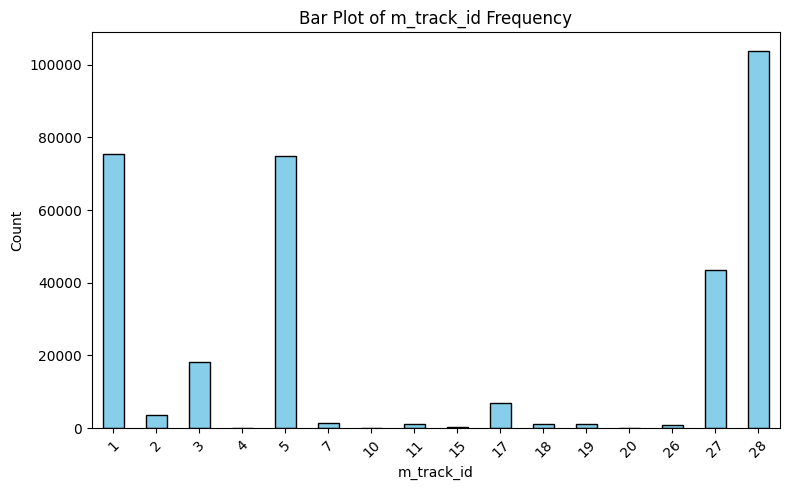

In [213]:
# lets plot as ordinal to see the unique values
plot_ordinal_bars('m_track_id', df_weather)

#### Track Temperature ####

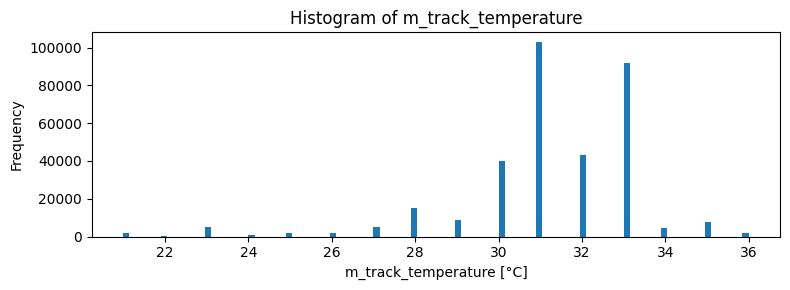

count    332544.000000
mean         31.217373
std           2.183828
min          21.000000
25%          31.000000
50%          31.000000
75%          33.000000
max          36.000000
Name: m_track_temperature, dtype: float64

In [173]:
# Plot histogram

plot_histogram('m_track_temperature', df_weather, unit="\u00b0C", number_bins=100)

#### Track Length ####

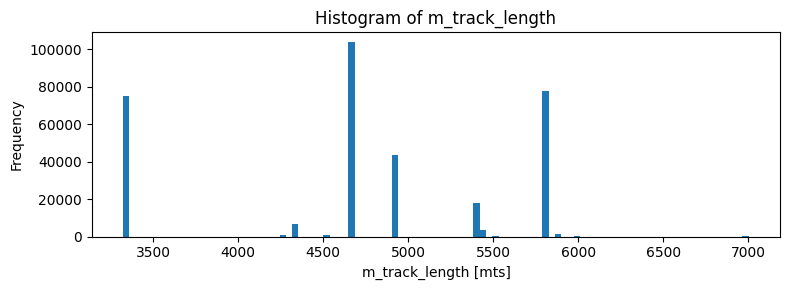

count    332544.000000
mean       4707.072754
std         877.393278
min        3323.000000
25%        4525.000000
50%        4650.000000
75%        5441.000000
max        7003.000000
Name: m_track_length, dtype: float64

In [175]:
# Plot histogram

plot_histogram('m_track_length', df_weather, unit="mts", number_bins=100)


#### Marshal Zones ####

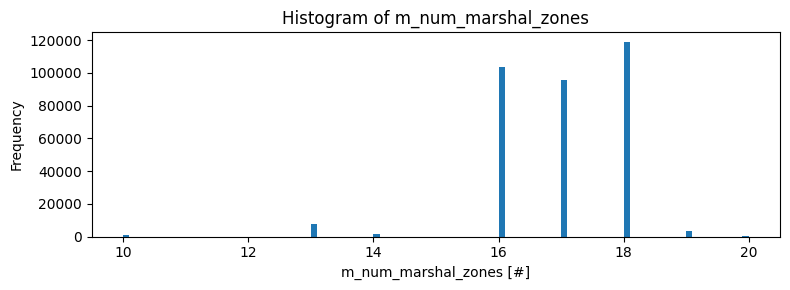

count    332544.000000
mean         16.937978
std           1.131994
min          10.000000
25%          16.000000
50%          17.000000
75%          18.000000
max          20.000000
Name: m_num_marshal_zones, dtype: float64

In [179]:
# Plot histogram

plot_histogram('m_num_marshal_zones', df_weather, unit="#", number_bins=100)


#### Safety Cart Status ####

m_safety_car_status - categories found: [0 1 2 3] 



,Count,Percentage
m_safety_car_status,,
0,329864,99.194092
1,480,0.144342
2,7,0.002105
3,2193,0.659462


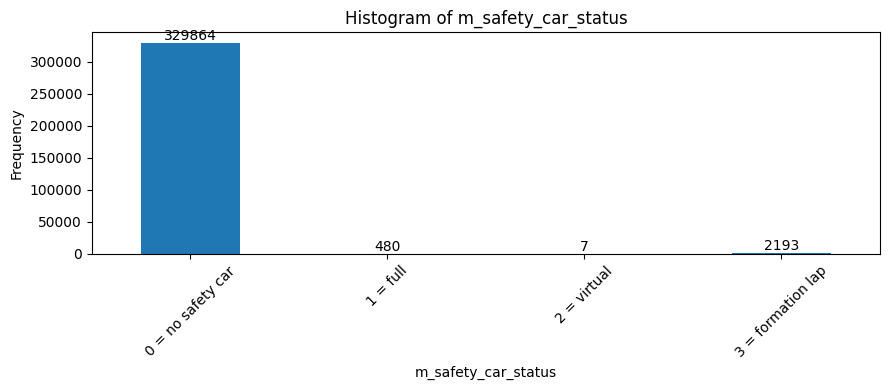

In [181]:
# Define category mapping
category_mapping = {
    0 : '0 = no safety car', 
    1 : '1 = full', 
    2 : '2 = virtual', 
    3 : '3 = formation lap'
}


bar_plot(df_weather,'m_safety_car_status',category_mapping)

#### Total Laps ####

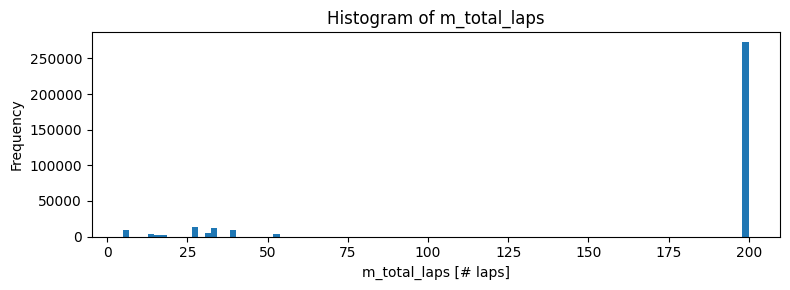

count    332544.000000
mean        168.965791
std          66.641631
min           5.000000
25%         200.000000
50%         200.000000
75%         200.000000
max         200.000000
Name: m_total_laps, dtype: float64

In [212]:
# Plot histogram

plot_histogram('m_total_laps', df_weather, unit="# laps", number_bins=100)

,Count,Percentage
m_total_laps,,
5,9860,2.965021
11,106,0.031875
13,337,0.101340
14,2768,0.832371
16,2607,0.783956
17,1942,0.583983
18,73,0.021952
27,12923,3.886102
28,10,0.003007


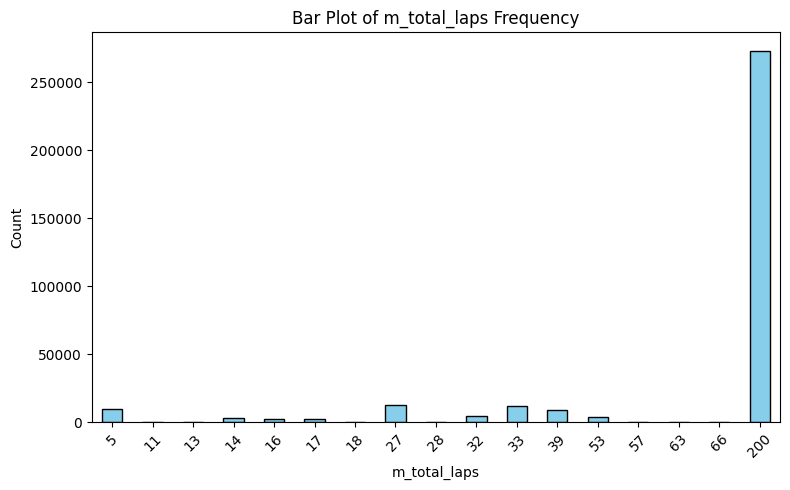

In [168]:
# lets plot as ordinal to see the unique values - likely there is a correlation with the track and session
plot_ordinal_bars('m_total_laps', df_weather)

#### Correlation Analysis - Track related ####

Correlation Table:
                     m_track_id  m_track_temperature  m_track_length  \
m_track_id             1.000000             0.486396       -0.089244   
m_track_temperature    0.486396             1.000000       -0.069530   
m_track_length        -0.089244            -0.069530        1.000000   
m_num_marshal_zones   -0.389037            -0.128949       -0.222490   
m_safety_car_status    0.007006            -0.000871       -0.002432   
m_total_laps           0.036111             0.127826       -0.144075   

                     m_num_marshal_zones  m_safety_car_status  m_total_laps  
m_track_id                     -0.389037             0.007006      0.036111  
m_track_temperature            -0.128949            -0.000871      0.127826  
m_track_length                 -0.222490            -0.002432     -0.144075  
m_num_marshal_zones             1.000000             0.006556      0.059729  
m_safety_car_status             0.006556             1.000000     -0.183149  
m_total_

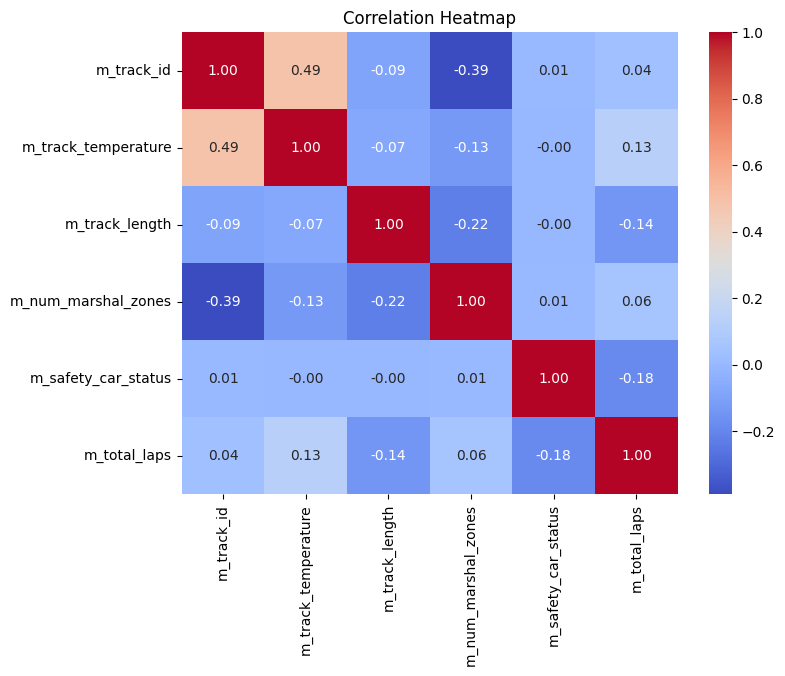

In [182]:
# Selecting specific columns for correlation analysis
selected_columns = ['m_track_id', 'm_track_temperature', 'm_track_length', 'm_num_marshal_zones', 'm_safety_car_status', 'm_total_laps']

plot_correlation_matrix(df_weather, selected_columns)

#### **Weather related** ####

|Column|Description|Notes|
|---|---|---|
|m_air_temperature    |Air temp. in degrees celsius|Quantitative|
|m_forecast_accuracy  |0 = Perfect, 1 = Approximate.|Binary|
|m_weather            |Weather - 0 = clear, 1 = light cloud, 2 = overcast, 3 = light rain, 4 = heavy rain, 5 = storm|Ordinal|

#### Air Temperature ####

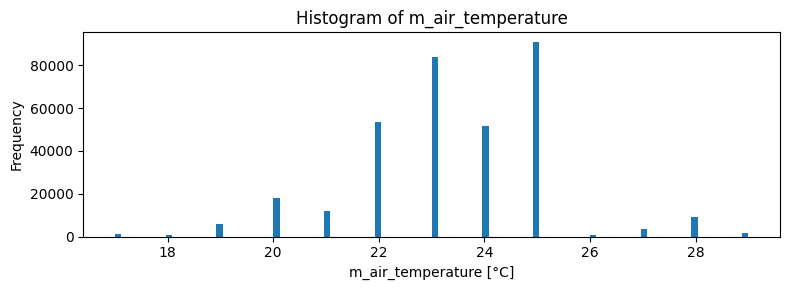

count    332544.000000
mean         23.413527
std           1.838815
min          17.000000
25%          22.000000
50%          23.000000
75%          25.000000
max          29.000000
Name: m_air_temperature, dtype: float64

In [183]:
# Plot histogram

plot_histogram('m_air_temperature', df_weather, unit="\u00b0C", number_bins=100)

#### Forecast accuracy ####

m_forecast_accuracy - categories found: [0 1] 



,Count,Percentage
m_forecast_accuracy,,
0,321547,96.693069
1,10997,3.306931


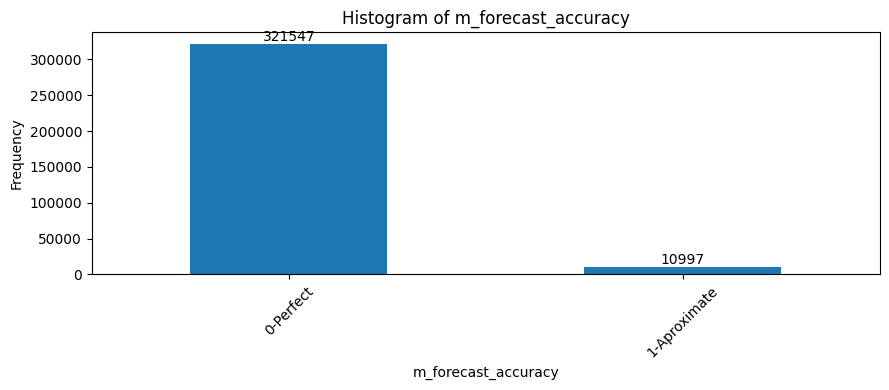

In [188]:
# Define category mapping
category_mapping = {
    0: "0-Perfect",
    1: "1-Aproximate",
}

bar_plot(df_weather,'m_forecast_accuracy',category_mapping)

#### Weather ####

m_weather - categories found: [0 1 2 3 5] 



,Count,Percentage
m_weather,,
0,265236,79.759671
1,33451,10.059120
2,19782,5.948686
3,5099,1.533331
5,8976,2.699192


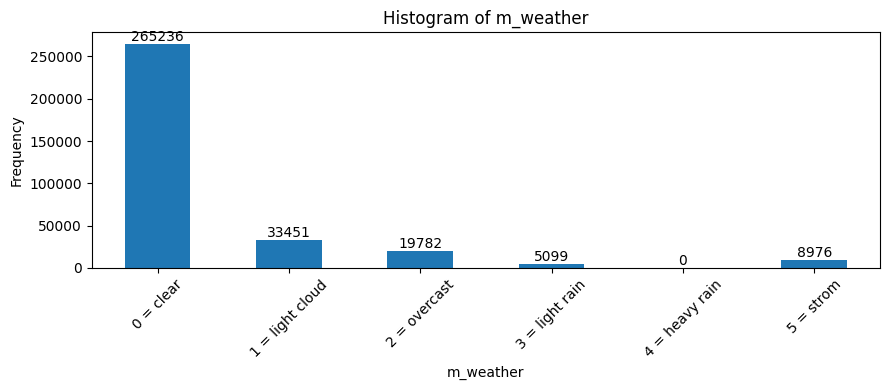

In [189]:
# Define category mapping
category_mapping = {
    0 : '0 = clear', 
    1 : '1 = light cloud', 
    2 : '2 = overcast', 
    3 : '3 = light rain',
    4: '4 = heavy rain',
    5: '5 = strom'}

bar_plot(df_weather,'m_weather',category_mapping)

#### **Correlation Weather related** ####

Correlation Table:
                     m_air_temperature  m_forecast_accuracy  m_weather
m_air_temperature             1.000000             0.144529   -0.38490
m_forecast_accuracy           0.144529             1.000000    0.16075
m_weather                    -0.384900             0.160750    1.00000


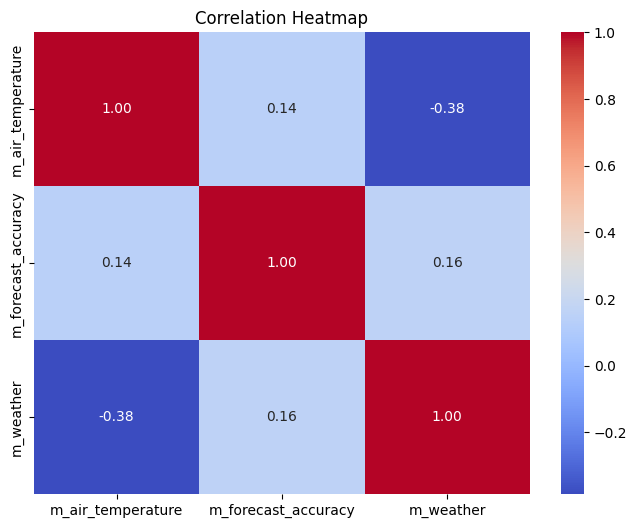

In [190]:
# Selecting specific columns for correlation analysis
selected_columns = ['m_air_temperature', 'm_forecast_accuracy', 'm_weather']

plot_correlation_matrix(df_weather, selected_columns)

#### **Other elements** ####

|Columns|Description|Notes|
|---|---|---|
|m_formula                 |Formula, 0 = F1 Modern, 1 = F1 Classic, 2 = F2, 3 = F1 Generic|Categorical|
|m_dynamic_racing_line_type|0 = 2D, 1 = 3D|Binary|
|m_dynamic_racing_line     |0 = off, 1 = corners only, 2 = full|Categorical|
|m_ai_difficulty           |AI Difficulty rating – 0-110|Quantitative|
|m_network_game            |0 = offline, 1 = online|Binary|
|m_game_paused             |Whether the game is paused|Binary|
|m_is_spectating           |Whether the player is spectating|Binary|
|m_spectator_car_index     |Index of the car being spectated||
|m_season_link_identifier  |Identifier for season - persists across saves||
|m_weekend_link_identifier |Identifier for weekend - persists across saves||



#### Formula ####

m_formula - categories found: [0 3] 



,Count,Percentage
m_formula,,
0,331430,99.665007
3,1114,0.334993


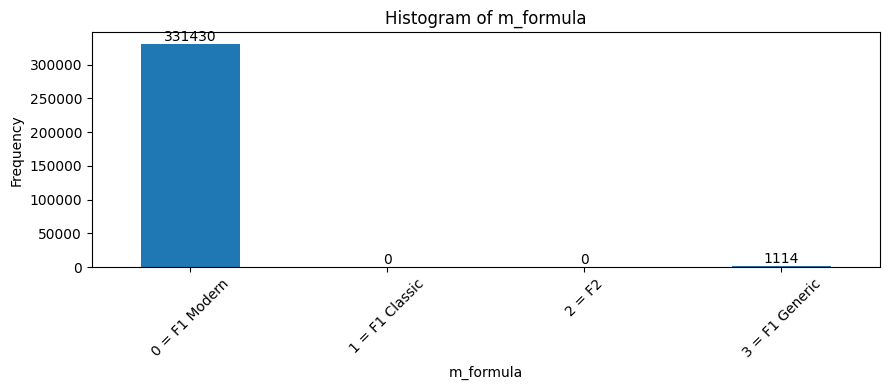

In [191]:
# Define category mapping
category_mapping = {
    0 : '0 = F1 Modern', 
    1 : '1 = F1 Classic', 
    2 : '2 = F2', 
    3 : '3 = F1 Generic'}

bar_plot(df_weather,'m_formula',category_mapping)

#### Dynamic Racing line type ####

m_dynamic_racing_line_type - categories found: [0 1] 



,Count,Percentage
m_dynamic_racing_line_type,,
0,304814,91.661254
1,27730,8.338746


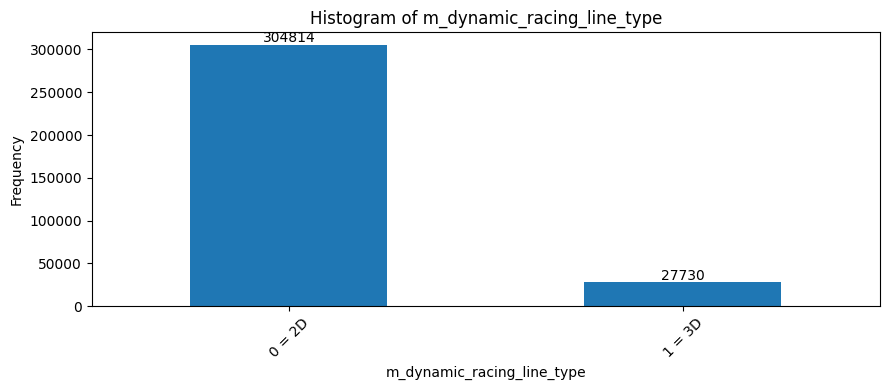

In [192]:
# Define category mapping
category_mapping = {
    0 : '0 = 2D', 
    1 : '1 = 3D'}

bar_plot(df_weather,'m_dynamic_racing_line_type',category_mapping)

#### Dynamic Racing Line ####

m_dynamic_racing_line - categories found: [0 2] 



,Count,Percentage
m_dynamic_racing_line,,
0,304814,91.661254
2,27730,8.338746


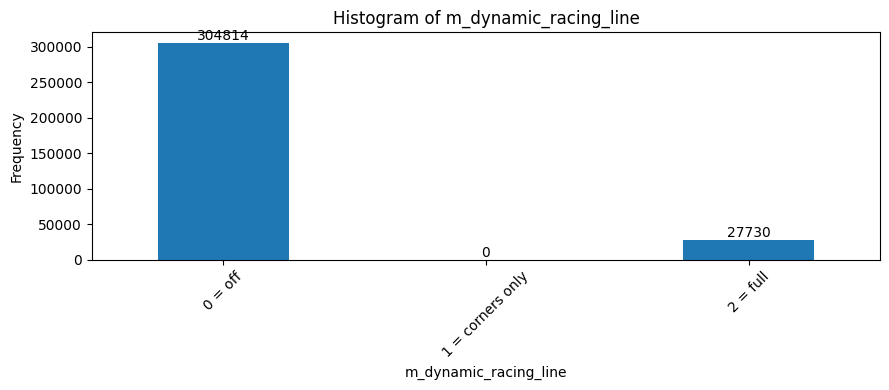

In [197]:
# Define category mapping
category_mapping = {
    0 : '0 = off', 
    1 : '1 = corners only', 
    2 : '2 = full'}

bar_plot(df_weather,'m_dynamic_racing_line',category_mapping)

#### AI difficulty ####

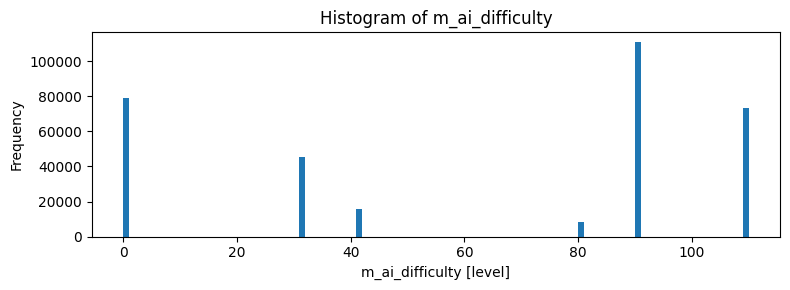

count    332544.000000
mean         62.359026
std          42.948964
min           0.000000
25%          31.000000
50%          90.000000
75%          90.000000
max         110.000000
Name: m_ai_difficulty, dtype: float64

In [196]:
# Plot histogram

plot_histogram('m_ai_difficulty', df_weather, unit="level", number_bins=110)

#### Network Game ####

m_network_game - categories found: [0 1] 



,Count,Percentage
m_network_game,,
0,210368,63.2602
1,122176,36.7398


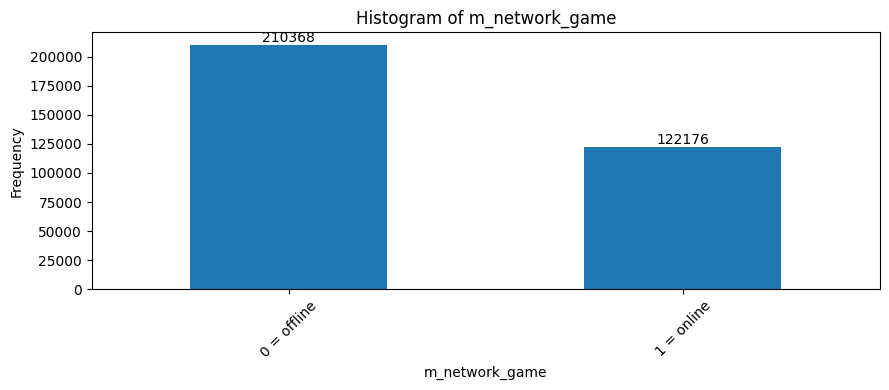

In [198]:
# Define category mapping
category_mapping = {
    0 : '0 = offline', 
    1 : '1 = online'}

bar_plot(df_weather,'m_network_game',category_mapping)

#### Game paused ####

,Count,Percentage
m_game_paused,,
0,325858,97.989439
1,6686,2.010561


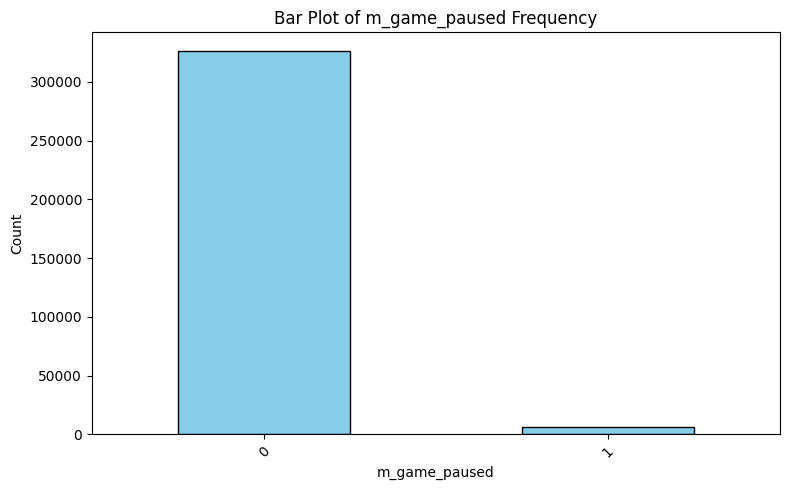

In [202]:
# lets plot as ordinal to see the unique values
plot_ordinal_bars('m_game_paused', df_weather)

#### Whether the player is spectating ####

,Count,Percentage
m_is_spectating,,
0,323910,97.403652
1,8634,2.596348


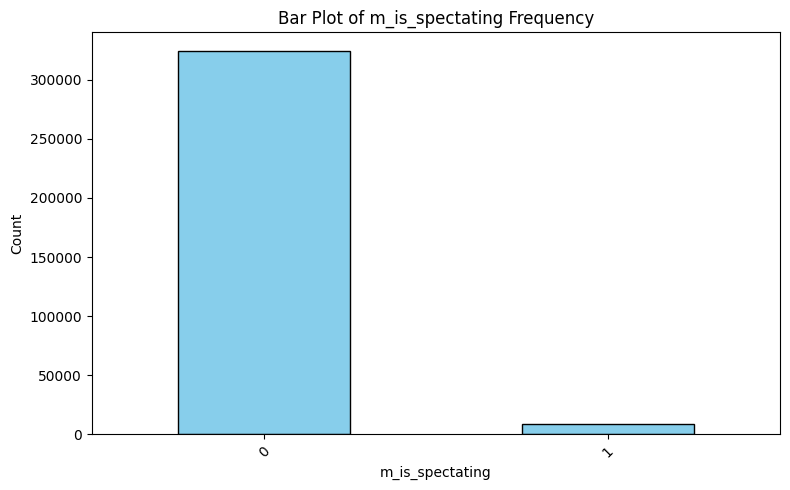

In [203]:
# lets plot as ordinal to see the unique values
plot_ordinal_bars('m_is_spectating', df_weather)

#### Spectator car index ####

,Count,Percentage
m_spectator_car_index,,
0,1967,0.591501
1,1074,0.322965
2,1175,0.353337
3,509,0.153062
4,475,0.142838
5,658,0.197869
6,558,0.167797
7,276,0.082997
8,500,0.150356


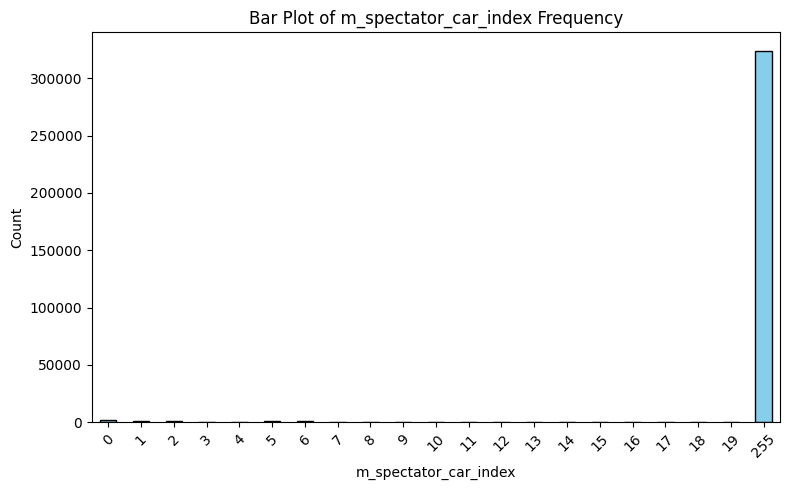

In [214]:
# lets plot as ordinal to see the unique values
plot_ordinal_bars('m_spectator_car_index', df_weather)

#### Is Spectating vs Spectator Car Index ####

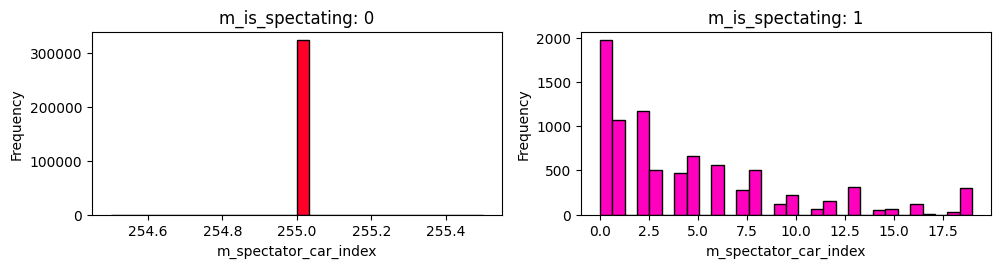

In [218]:
# Define category mapping
category_mapping = {
    0: '0', 
    1: '1'}

# Use pyplot.get_cmap() to get the colormap
colormap = plt.get_cmap('gist_rainbow', len(category_mapping))  # Choose the colormap

# Get unique session types
session_types = df_weather['m_is_spectating'].unique()
num_types = len(session_types)

# Define grid size (4x4)
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through session types and plot histograms
for i, session_type in enumerate(session_types):
    subset = df_weather[df_weather['m_is_spectating'] == session_type]
    axes[i].hist(subset['m_spectator_car_index'], bins=30, color=colormap(i), edgecolor='black')
    axes[i].set_title(f'm_is_spectating: {category_mapping[session_type]}')
    axes[i].set_xlabel('m_spectator_car_index')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation for other columns ####

Correlation Table:
                            m_formula  m_dynamic_racing_line_type  \
m_formula                    1.000000                    0.192216   
m_dynamic_racing_line_type   0.192216                    1.000000   
m_dynamic_racing_line        0.192216                    1.000000   
m_ai_difficulty             -0.028832                   -0.214579   
m_network_game               0.076075                   -0.098977   
m_game_paused               -0.008305                   -0.041654   
m_is_spectating              0.056968                   -0.016345   
m_spectator_car_index       -0.055311                    0.016689   

                            m_dynamic_racing_line  m_ai_difficulty  \
m_formula                                0.192216        -0.028832   
m_dynamic_racing_line_type               1.000000        -0.214579   
m_dynamic_racing_line                    1.000000        -0.214579   
m_ai_difficulty                         -0.214579         1.000000   
m_network

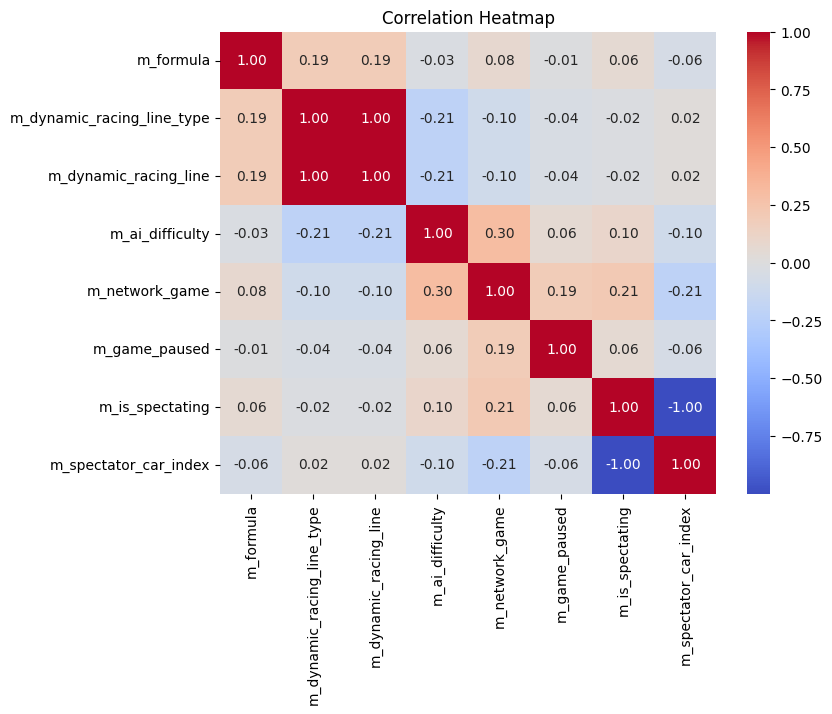

In [211]:
# Selecting specific columns for correlation analysis
selected_columns = ['m_formula','m_dynamic_racing_line_type','m_dynamic_racing_line', 'm_ai_difficulty', 'm_network_game', 'm_game_paused', 'm_is_spectating', 'm_spectator_car_index']

plot_correlation_matrix(df_weather, selected_columns)

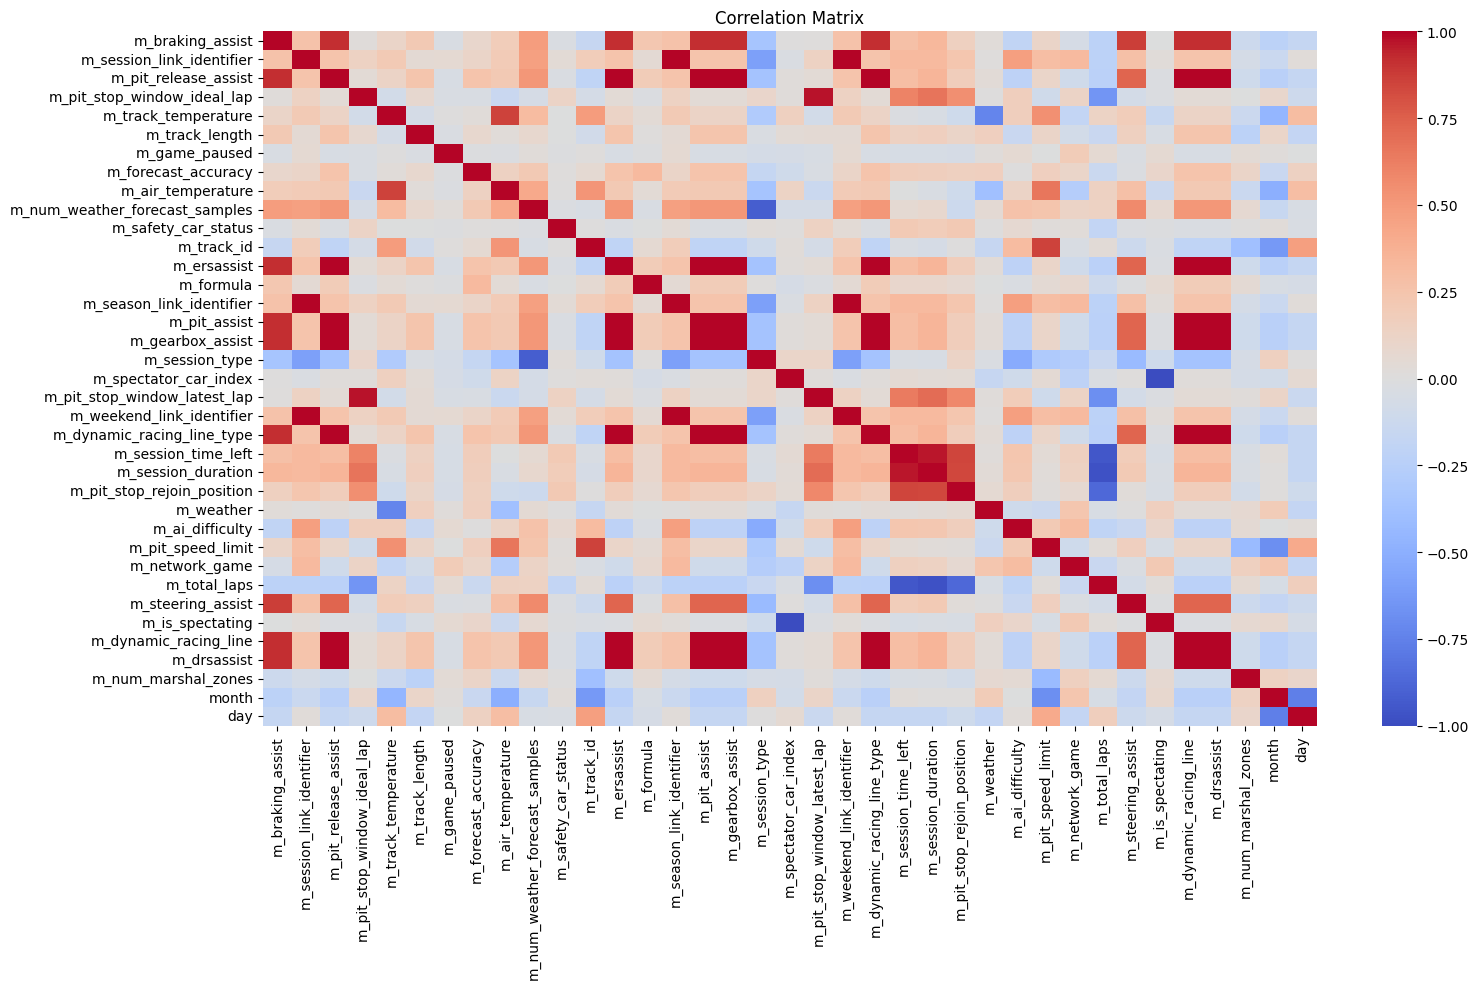

In [120]:
# Correlation Map
numeric_variables = df_weather.select_dtypes(include=np.number)
correlation_table = numeric_variables.corr()
correlation_table


# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_table, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

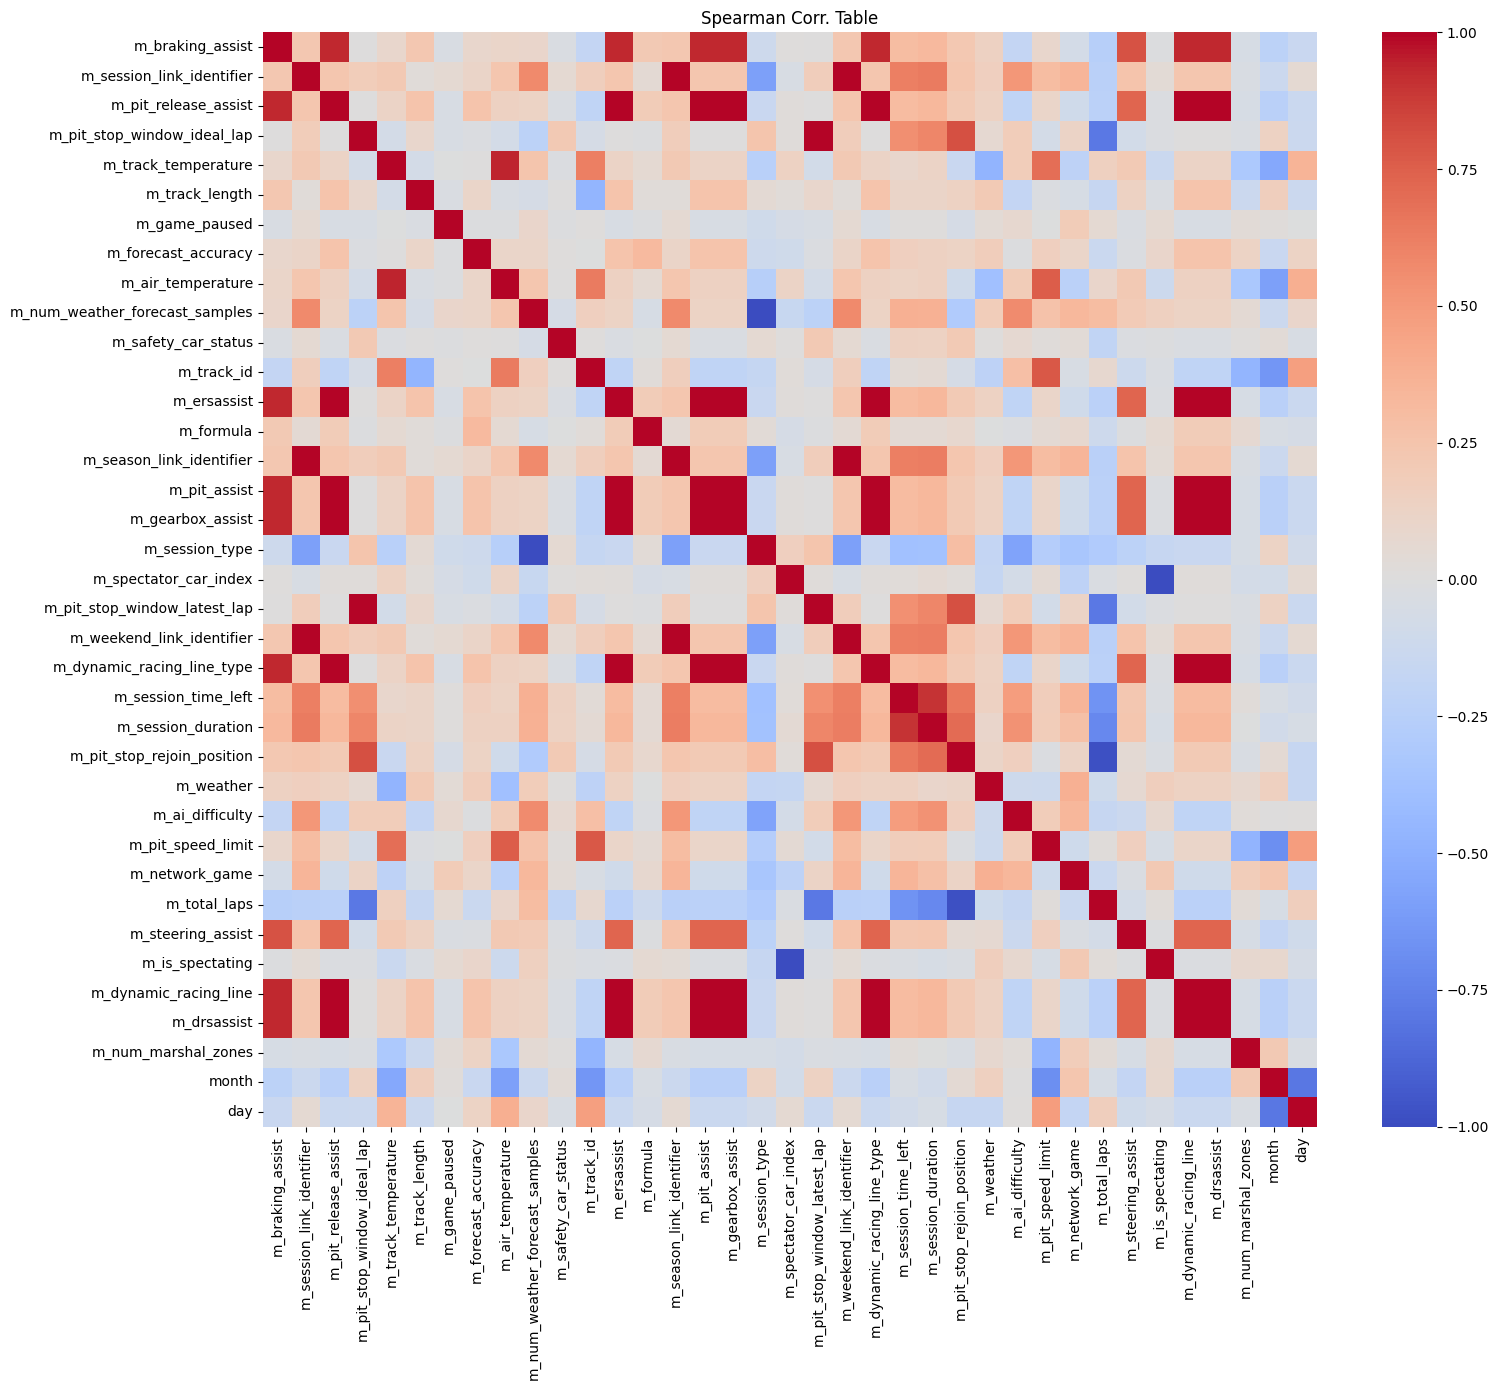

In [121]:
# same but for Spearman
correlation_table = numeric_variables.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_table, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Corr. Table')
plt.tight_layout()
plt.show()

---

## Insights Summary ##

`m_braking_assist`

- Vast majority (92.66%) with bracking assist off.
- No samples for breaking assistant category low.

`m_session_link_identifier`

- Found 23.84% of the observations with value zero. That can indicate that for those observations the identifier is not applicable or not available.
- Doing the histogram with values greather than one looks to be a bit more uniform.

`m_pit_release_assist`

- Binary variable where majority (91.66%) of observations with pit release assist off.

`timestamp`

- Not a continues distribution of timestamps but rather buckets. This aligns with the observation during cleaning for certan days/months of the 2022. In particular, from 01-05-2022 until 02-12-2022.


---

<span style="color:red">

---
----
</span>

## FOR REFERENCE: OLD Analysis used for .CSV ##

This section is added to show my work. Execution STOPS here as this is old and not the final analysis.

<span style="color:red">

---
--- 
</span>


### Data cleaning and preprocessing

In [ ]:
# Will start reviewing the columns that are likely irrelevant, e.g. same value.
# For that will use those with standard deviation zero (from summary stats above) as possible list:
# M_PACKET_FORMAT
# M_GAME_MAJOR_VERSION
# M_PACKET_VERSION
# M_PACKET_ID
# M_SECONDARY_PLAYER_CAR_INDEX
# M_SLI_PRO_NATIVE_SUPPORT
# M_SAFETY_CAR_STATUS


# Will keep an array of the columns to drop
columns_to_drop = []

display(df_weather['M_PACKET_FORMAT'].describe().transpose())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_PACKET_FORMAT')

# Continue with next column
display(df_weather['M_GAME_MAJOR_VERSION'].describe().transpose())
display(df_weather['M_GAME_MAJOR_VERSION'].unique())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_GAME_MAJOR_VERSION')

# Continue with next column
display(df_weather['M_PACKET_VERSION'].describe().transpose())
display(df_weather['M_PACKET_VERSION'].unique())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_PACKET_VERSION')

# Continue with next column
display(df_weather['M_PACKET_ID'].describe().transpose())
display(df_weather['M_PACKET_ID'].unique())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_PACKET_ID')

# Continue with next column
display(df_weather['M_SECONDARY_PLAYER_CAR_INDEX'].describe().transpose())
display(df_weather['M_SECONDARY_PLAYER_CAR_INDEX'].unique())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_SECONDARY_PLAYER_CAR_INDEX')

# Continue with next column
display(df_weather['M_SLI_PRO_NATIVE_SUPPORT'].describe().transpose())
display(df_weather['M_SLI_PRO_NATIVE_SUPPORT'].unique())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_SLI_PRO_NATIVE_SUPPORT')

# Continue with next column
display(df_weather['M_SAFETY_CAR_STATUS'].describe().transpose())
display(df_weather['M_SAFETY_CAR_STATUS'].unique())

In [ ]:
# This one can be drop because it is constant no matter the observation
columns_to_drop.append('M_SAFETY_CAR_STATUS')

In [ ]:
# Last columns 'Unnamed: 58' has zero count so that one can be dropped as well
df_weather = df_weather.drop(columns=['Unnamed: 58'])

In [ ]:
# Look at the columns will less observations
df_weather.count().sort_values(ascending=True)

The are some columns with less than 3572328 rows and for those some action could be needed if any of those columns is used later
E.g. as part of modelling.

For now, will just list columns - but no action will be done.

|Column| Count|
|---|---|
|M_ZONE_START                                      | 974274
|M_ZONE_FLAG                                       | 974274
|M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE      |2598054
|M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE         |2598054
|M_TIME_OFFSET                                     |2598054
|M_WEATHER_FORECAST_SAMPLES_M_WEATHER              |2598054
|M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE    |2598054
|M_TRACK_TEMPERATURE_CHANGE                        |2598054
|M_AIR_TEMPERATURE_CHANGE                          |2598054
|M_RAIN_PERCENTAGE                                 |2598054
|GAMEHOST                                          |2663112

With 3572327 observations:
|Column|Column|Column|
|---|---|---|
|M_DRSASSIST              |M_NUM_MARSHAL_ZONES	|M_NETWORK_GAME                                    
|M_TOTAL_LAPS             |M_STEERING_ASSIST    |M_IS_SPECTATING                                   
|M_DYNAMIC_RACING_LINE    |M_AI_DIFFICULTY               |M_PIT_SPEED_LIMIT                                 
|M_PIT_STOP_REJOIN_POSITION   |M_SESSION_DURATION        |M_SESSION_TIME_LEFT                               
|M_DYNAMIC_RACING_LINE_TYPE   |M_WEEKEND_LINK_IDENTIFIER |M_WEATHER                                         
|M_PIT_STOP_WINDOW_LATEST_LAP |M_GAME_MINOR_VERSION      |M_GEARBOX_ASSIST                                  
|M_SESSION_UID                |M_SESSION_TIME            |M_FRAME_IDENTIFIER                                
|M_PLAYER_CAR_INDEX           |M_BRAKING_ASSIST          |M_SESSION_LINK_IDENTIFIER                         
|M_PIT_RELEASE_ASSIST         |TIMESTAMP                 |M_PIT_STOP_WINDOW_IDEAL_LAP                       
|M_SPECTATOR_CAR_INDEX        |M_TRACK_TEMPERATURE       |M_GAME_PAUSED                                     
|M_FORECAST_ACCURACY          |M_AIR_TEMPERATURE         |M_NUM_WEATHER_FORECAST_SAMPLES                    
|M_TRACK_ID                   |M_ERSASSIST               |M_FORMULA                                         
|M_SEASON_LINK_IDENTIFIER     |M_PIT_ASSIST              |M_TRACK_LENGTH                                    
|M_SESSION_TYPE

### Data visualization (e.g., histograms, scatterplots, etc.)
- You should write a brief summary of the insights and conclusions you have drawn from your analysis.

|Item|Insights|
|---|---|
|M_WEATHER|- 74.59% of data points under clear weather.<br/>- No data for categories: 3(light rain) and 4 (heavy rain).<br/>- Ordinal data as categories has an explicit order, so important to consider for future analysis.
|M_AIR_TEMPERATURE |- Integer values, instead of continuous as you may expect.<br/>- When plotting histogram  |


In [ ]:
#### Will check that the data aligns with the definition of some categorical columns
# M_WEATHER should be 0 = clear, 1 = light cloud, 2 = overcast, 3 = light rain, 4 = heavy rain, 5 = storm

# Get unique values and sort them
unique_values = np.sort(df_weather['M_WEATHER'].unique())
print("M_WEATHER - categories found:", unique_values)

# Define category mapping
category_mapping = {
        0: "0-Clear",
        1: "1-Light Cloud",
        2: "2-Overcast",
        3: "3-Light Rain",
        4: "4-Heavy Rain",
        5: "5-Storm"
    }

fig = plt.figure(figsize=(5, 3))
# plt.hist(df_weather['M_WEATHER'],bins=100)
# will use bars as it is more clear for a column that is categorical
ax = df_weather['M_WEATHER'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('M_WEATHER')
plt.ylabel('Frequency')
plt.title('Histogram of M_WEATHER')

# Debugging: Get the x-tick labels text 
xticks = ax.get_xticklabels()
# for tick in xticks:
#    print(tick.get_text())

# Create a list of labels using the category mapping
xticklabels = [category_mapping[int(tick.get_text())] for tick in xticks]

# Set the x-tick labels
ax.set_xticklabels(xticklabels)

# Rotate the labels for better readability
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Apply the category mapping to the 'M_WEATHER' column
df_weather['M_WEATHER_LABEL'] = df_weather['M_WEATHER'].map(category_mapping)

# Create a frequency table with counts and percentages
frequency_table = df_weather['M_WEATHER_LABEL'].value_counts().reset_index()

# Rename columns for clarity
frequency_table.columns = ['M_WEATHER', 'Count']

# Add a percentage column
frequency_table['Percentage'] = (frequency_table['Count'] / len(df_weather["M_WEATHER"])) * 100

# Round the percentage values for readability
frequency_table['Percentage'] = frequency_table['Percentage'].round(2)

# Display the frequency table
display(frequency_table)


In [ ]:
# M_AIR_TEMPERATURE in C

# Get unique values and sort them
unique_values = np.sort(df_weather['M_AIR_TEMPERATURE'].unique())
print("M_AIR_TEMPERATURE - values found:", unique_values)


fig = plt.figure(figsize=(5, 3))
plt.hist(df_weather['M_AIR_TEMPERATURE'],bins=100)
plt.xlabel('M_AIR_TEMPERATURE (in $^\circ$C)')
plt.ylabel('Frequency')
plt.title('Histogram of M_AIR_TEMPERATURE')

plt.tight_layout()
plt.show()

In [ ]:
df_weather["M_AIR_TEMPERATURE"].describe().round(3)

In [ ]:
fig = plt.figure(figsize=(5, 3))
for weather, group in df_weather.groupby('M_WEATHER_LABEL'):
    plt.hist(group['M_AIR_TEMPERATURE'], bins=10, alpha=0.5, label=weather)
plt.xlabel('M_AIR_TEMPERATURE ($^\circ$C)')
plt.ylabel('Frequency')
plt.title('Histogram of M_AIR_TEMPERATURE')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

# Generate a list of colors (you can choose any colormap here)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_weather['M_WEATHER_LABEL'].unique())))

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(df_weather['M_WEATHER_LABEL'].unique()), ncols=1, figsize=(5, 3 * len(df_weather['M_WEATHER_LABEL'].unique())))

# Flatten axes if there are multiple subplots
axes = axes.flatten()

# Plot each group in a separate subplot
for i, (weather, group) in enumerate(df_weather.groupby('M_WEATHER_LABEL')):
    axes[i].hist(group['M_AIR_TEMPERATURE'], bins=10, alpha=0.7, color=colors[i])
    axes[i].set_xlabel('M_AIR_TEMPERATURE ($^\circ$C)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of M_AIR_TEMPERATURE ({weather})')

# Adjust layout for better display
plt.tight_layout()
plt.show()